#**Lab One: Vizualization and Data Preprocessing**

**Group 2 Members:**
Reagan Meagher, Jaclyn Coate, Megan Riley, and Matthew Chinchilla

**Kaggle Link To Data:** https://www.kaggle.com/muonneutrino/us-census-demographic-data

## **Business Understanding**


The data we used for Lab One is a 2015 United States census data set for the all 50 states at the census tract level, accessed via Kaggle. This data set contains demographic data about each census tract such as ethnicity, job function, commute types, poverty, income, and unemployment. We also have the 2017 version of this data set. 

This data set was orignally collected by the United States Census Bureau to gain insights into the demographics of areas of the U.S. on a granular level. 

For us, the purpose of this data set is to determine which characteristics of a geographical area determine the level of poverty in that respective area. Poverty in this data set is given as a percentage of the population, but in order for this to be a classification we turned that percentage into a factor with four levels: Low Poverty, Average Poverty, High Poverty, and Extreme Poverty. We will discuss this new dependent variable in detail in the new features section.

We will have successfully mined useful knowledge from this data set if we can determine which charactersitcs of a geographical area from the attributes in our data set are the most highly correlated with certain poverty classes. This will help lead us to building a classification model that can accruately predict which poverty class that geographical area is. 

Our classification model will be built with the data at the census tract level and we will test our model at various geographical levels including census tract, zip code, city, and county. 

The poverty level of an area is very important as it has social, cultural, political, and economic implications. Therefore, we need to know for sure if an area is at a certain poverty level. We also need to know that if we change certain characteristics of a geographical area if that would likely change the poverty level or not. That leads us to thinking that the accuracy of our model, that being the rate of correct poverty class predictions, is highly important if we are to label our model as an effective model to predict poverty class of a geographical area. 

Therefore, we will focus on the accuracy metric as a determintent of a successfull classification model or not. An 85% accuracy level would suffice as an effective classifcation model. 

We are not concerend with sensitivity and specificity as both would mean a wrong classification of the geographical area. Depending on the use of the model in certain industries and sectors a wrong poverty class classification could infinite impacts such as employement prospects, government funding, school budgets, and community services. For example, if this model were to be used by a company looking to open an office in a certain area a wrong poverty class classification of that area could cause them to not open, leading to lost employment prospects in that area.



### Data Load

In [4]:
#Load and Explore Census 2015 and 2017 Data
import pandas as pd
import numpy as np

census2015 = "https://raw.githubusercontent.com/megnn/SMUMSDS_ML1/master/acs2015_census_tract_data.csv"
census2017 = "https://raw.githubusercontent.com/megnn/SMUMSDS_ML1/master/acs2017_census_tract_data.csv"


data2015 = pd.read_csv(census2015)
data2017 = pd.read_csv(census2017)
data2015.head()

CensusTract    State   County  TotalPop   Men  Women  Hispanic  White  \
0   1001020100  Alabama  Autauga      1948   940   1008       0.9   87.4   
1   1001020200  Alabama  Autauga      2156  1059   1097       0.8   40.4   
2   1001020300  Alabama  Autauga      2968  1364   1604       0.0   74.5   
3   1001020400  Alabama  Autauga      4423  2172   2251      10.5   82.8   
4   1001020500  Alabama  Autauga     10763  4922   5841       0.7   68.5   

   Black  Native  ...  Walk  OtherTransp  WorkAtHome  MeanCommute  Employed  \
0    7.7     0.3  ...   0.5          2.3         2.1         25.0       943   
1   53.3     0.0  ...   0.0          0.7         0.0         23.4       753   
2   18.6     0.5  ...   0.0          0.0         2.5         19.6      1373   
3    3.7     1.6  ...   0.0          2.6         1.6         25.3      1782   
4   24.8     0.0  ...   0.0          0.6         0.9         24.8      5037   

   PrivateWork  PublicWork  SelfEmployed  FamilyWork  Unemployment  
0         77.1        18.3           4.6         0.0           5.4  
1         77.0        16.9           6.1         0.0          13.3  
2         64.1        23.6          12.3         0.0           6.2  
3         75.7        21.2           3.1         0.0          10.8  
4         67.1        27.6           5.3         0.0           4.2  

[5 rows x 37 columns]

### Variable Creation: Poverty Class

In [5]:
#Create new categorical dependent variable: PovertyClass
PovertyClass = pd.cut(data2015.Poverty,bins=[0,7,12.5,22,100],labels=
['Low Poverty','Average Poverty','High Poverty','Extreme Poverty'])
data2015.insert(37,'PovertyClass',PovertyClass)

PovertyClass = pd.cut(data2017.Poverty,bins=[0,7,12.5,22,100],labels=
['Low Poverty','Average Poverty','High Poverty','Extreme Poverty'])
data2017.insert(37,'PovertyClass',PovertyClass)
data2015.head()

CensusTract    State   County  TotalPop   Men  Women  Hispanic  White  \
0   1001020100  Alabama  Autauga      1948   940   1008       0.9   87.4   
1   1001020200  Alabama  Autauga      2156  1059   1097       0.8   40.4   
2   1001020300  Alabama  Autauga      2968  1364   1604       0.0   74.5   
3   1001020400  Alabama  Autauga      4423  2172   2251      10.5   82.8   
4   1001020500  Alabama  Autauga     10763  4922   5841       0.7   68.5   

   Black  Native  ...  OtherTransp  WorkAtHome  MeanCommute  Employed  \
0    7.7     0.3  ...          2.3         2.1         25.0       943   
1   53.3     0.0  ...          0.7         0.0         23.4       753   
2   18.6     0.5  ...          0.0         2.5         19.6      1373   
3    3.7     1.6  ...          2.6         1.6         25.3      1782   
4   24.8     0.0  ...          0.6         0.9         24.8      5037   

   PrivateWork  PublicWork  SelfEmployed  FamilyWork  Unemployment  \
0         77.1        18.3           4.6         0.0           5.4   
1         77.0        16.9           6.1         0.0          13.3   
2         64.1        23.6          12.3         0.0           6.2   
3         75.7        21.2           3.1         0.0          10.8   
4         67.1        27.6           5.3         0.0           4.2   

      PovertyClass  
0  Average Poverty  
1  Extreme Poverty  
2     High Poverty  
3      Low Poverty  
4  Average Poverty  

[5 rows x 38 columns]

### Variable Creation: Other
Rounds out the additiona ethnic percentages to equal 100 for back calcuation in next section.

In [6]:
#Create new numerical independent variable: Other to account for reat of percentage of races
Other = ''
data2015.insert(12,'Other',Other)
data2017.insert(12,'Other',Other)

data2015['Other'] = 100 - (data2015['Hispanic'] + data2015['White'] + data2015['Black'] + data2015['Native'] + data2015['Asian'] + data2015['Pacific'])
data2015.head()

CensusTract    State   County  TotalPop   Men  Women  Hispanic  White  \
0   1001020100  Alabama  Autauga      1948   940   1008       0.9   87.4   
1   1001020200  Alabama  Autauga      2156  1059   1097       0.8   40.4   
2   1001020300  Alabama  Autauga      2968  1364   1604       0.0   74.5   
3   1001020400  Alabama  Autauga      4423  2172   2251      10.5   82.8   
4   1001020500  Alabama  Autauga     10763  4922   5841       0.7   68.5   

   Black  Native  ...  OtherTransp  WorkAtHome  MeanCommute  Employed  \
0    7.7     0.3  ...          2.3         2.1         25.0       943   
1   53.3     0.0  ...          0.7         0.0         23.4       753   
2   18.6     0.5  ...          0.0         2.5         19.6      1373   
3    3.7     1.6  ...          2.6         1.6         25.3      1782   
4   24.8     0.0  ...          0.6         0.9         24.8      5037   

   PrivateWork  PublicWork  SelfEmployed  FamilyWork  Unemployment  \
0         77.1        18.3           4.6         0.0           5.4   
1         77.0        16.9           6.1         0.0          13.3   
2         64.1        23.6          12.3         0.0           6.2   
3         75.7        21.2           3.1         0.0          10.8   
4         67.1        27.6           5.3         0.0           4.2   

      PovertyClass  
0  Average Poverty  
1  Extreme Poverty  
2     High Poverty  
3      Low Poverty  
4  Average Poverty  

[5 rows x 39 columns]

### ARE WE DOING THIS REAGAN?

In [7]:
#Drop Poverty %. 
#Potentially drop income and income error

### Variable Creation: Aggregate Numbers
These were created as a reference for visualization and analysis instead of the percentages that were given in the original data set.

In [8]:
#Code to create aggregated data frames at the county level
data2015agg = data2015.copy()
data2015agg['Hispanic'] = (data2015['Hispanic']/100) * data2015['TotalPop']
data2015agg['White'] = (data2015['White']/100) * data2015['TotalPop']
data2015agg['Black'] = (data2015['Black']/100) * data2015['TotalPop']
data2015agg['Native'] = (data2015['Native']/100) * data2015['TotalPop']
data2015agg['Asian'] = (data2015['Asian']/100) * data2015['TotalPop']
data2015agg['Pacific'] = (data2015['Pacific']/100) * data2015['TotalPop']
data2015agg['Other'] = (data2015['Other']/100) * data2015['TotalPop']
data2015agg['Poverty'] = (data2015['Poverty']/100) * data2015['TotalPop']
data2015agg['ChildPoverty'] = (data2015['ChildPoverty']/100) * data2015['TotalPop']
data2015agg['Professional'] = (data2015['Professional']/100) * data2015['TotalPop']
data2015agg['Service'] = (data2015['Service']/100) * data2015['TotalPop']
data2015agg['Office'] = (data2015['Office']/100) * data2015['TotalPop']
data2015agg['Construction'] = (data2015['Construction']/100) * data2015['TotalPop']
data2015agg['Production'] = (data2015['Production']/100) * data2015['TotalPop']
data2015agg['Drive'] = (data2015['Drive']/100) * data2015['TotalPop']
data2015agg['Carpool'] = (data2015['Carpool']/100) * data2015['TotalPop']
data2015agg['Transit'] = (data2015['Transit']/100) * data2015['TotalPop']
data2015agg['Walk'] = (data2015['Walk']/100) * data2015agg['TotalPop']
data2015agg['OtherTransp'] = (data2015['OtherTransp']/100) * data2015['TotalPop']
data2015agg['WorkAtHome'] = (data2015['WorkAtHome']/100) * data2015['TotalPop']
data2015agg['PrivateWork'] = (data2015['PrivateWork']/100) * data2015['TotalPop']
data2015agg['PublicWork'] = (data2015['PublicWork']/100) * data2015['TotalPop']
data2015agg['SelfEmployed'] = (data2015['SelfEmployed']/100) * data2015['TotalPop']
data2015agg['FamilyWork'] = (data2015['FamilyWork']/100) * data2015['TotalPop']
data2015agg['Unemployment'] = (data2015['Unemployment']/100) * data2015['TotalPop']

df = pd.DataFrame(data2015agg) 
df.to_csv('2015CensusAgg.csv')
data2015agg.head()

CensusTract    State   County  TotalPop   Men  Women  Hispanic     White  \
0   1001020100  Alabama  Autauga      1948   940   1008    17.532  1702.552   
1   1001020200  Alabama  Autauga      2156  1059   1097    17.248   871.024   
2   1001020300  Alabama  Autauga      2968  1364   1604     0.000  2211.160   
3   1001020400  Alabama  Autauga      4423  2172   2251   464.415  3662.244   
4   1001020500  Alabama  Autauga     10763  4922   5841    75.341  7372.655   

      Black  Native  ...  OtherTransp  WorkAtHome  MeanCommute  Employed  \
0   149.996   5.844  ...       44.804      40.908         25.0       943   
1  1149.148   0.000  ...       15.092       0.000         23.4       753   
2   552.048  14.840  ...        0.000      74.200         19.6      1373   
3   163.651  70.768  ...      114.998      70.768         25.3      1782   
4  2669.224   0.000  ...       64.578      96.867         24.8      5037   

   PrivateWork  PublicWork  SelfEmployed  FamilyWork  Unemployment  \
0     1501.908     356.484        89.608         0.0       105.192   
1     1660.120     364.364       131.516         0.0       286.748   
2     1902.488     700.448       365.064         0.0       184.016   
3     3348.211     937.676       137.113         0.0       477.684   
4     7221.973    2970.588       570.439         0.0       452.046   

      PovertyClass  
0  Average Poverty  
1  Extreme Poverty  
2     High Poverty  
3      Low Poverty  
4  Average Poverty  

[5 rows x 39 columns]

## **Data Meaning Type**

The data set we are using come from a [Kaggle dataset](https://www.kaggle.com/muonneutrino/us-census-demographic-data) US Census Demographic Data. The author describes the data as being taken from the DP03 and DP05 tables of the 2015 and 2017 American Community Survey 5-year estimates. The Data includes datasets for 2015 and 2017 census_tract_data. The census bureau defines each census tract a typical tract containing around 5000 residents. The smaller data set county_data is a rollup of the census tract data for each county. A new variable was created for this data set PovertyClass this is a categorical variable that was created to classify the poverty class each tract falls into.

The table below contains data definitions most definitions regarding race or ethnicity were sourced from the original [census brief overview](https://www.census.gov/prod/cen2010/briefs/c2010br-02.pdf). Other data definitions were obtained from the [Census bureau glossary](https://www.census.gov/glossary/). Below the data definitions table is addition information related to the variables.


|Column | Description|
| :---   | :---        |
| CensusTract     | The Census Tract Id as assigned by the US Census Bureau                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| State           | The State the data comes from                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| County          | The county the data comes from                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| TotalPop        | The total Population in a tract or county                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Men             | The total population of men in a given tract or county                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Women           | The total population of women in a given tract or county                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| Hispanic        | Percentage of population in a given tract or county that Identifies as Hispanic.  A hispanic is defined as a person of Cuban, Mexican, Puerto Rican, South or  Central American, or other Spanish culture or origin regardless of race.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| White           | Percentage of population in a given tract or county that identifies as white.  “White” refers to a person having origins in any of the original peoples of Europe,  the Middle East, or North Africa. It includes people who indicated their race(s) as  “White” or reported entries such as Irish, German, Italian, Lebanese,Arab, Moroccan,  or Caucasian.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| Black           | Percentage of population in a given tract or county that identifies as black.“Black or African American”  refers to a person having origins in any of the Black racial groups of Africa. It includes people who  indicated their race(s) as “Black, African Am., or Negro” or reported entries such as African American,  Kenyan, Nigerian, or Haitian.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Native          | Percentage of population in a given tract or county that identifies as native. “American Indian or  Alaska Native” refers to a person having origins in any of the original peoples of North and South America  (including Central America) and who maintains tribal affiliation or community attachment. This category  includes people who indicated their race(s) as “American Indian or Alaska Native” or reported their enrolled  or principal tribe, such as Navajo, Blackfeet, Inupiat, Yup’ik, or Central American Indian groups or South  American Indian groups.                                                                                                                                                                                                                                                                                                                          |
| Asian           | Percentage of population in a given tract or county that identifies as Asian.“Asian” refers to a person having origins in any of the original peoples of the Far East, Southeast Asia, or the Indian subcontinent, including, for example, Cambodia, China, India, Japan, Korea, Malaysia, Pakistan, the Philippine Islands, Thailand, and Vietnam. It includes people who indicated their race(s) as “Asian” or reported entries such as “Asian Indian,” “Chinese,” “Filipino,” “Korean,” “Japanese,” “Vietnamese,” and “Other Asian” or provided other detailed Asian responses.                                                                                                                                                                                                                                                                                                                  |
| Pacific         | Percentage of population in a given tract or county that identifies as Pacific.“Native Hawaiian or Other Pacific Islander” refers to a person having origins in any of the original peoples of Hawaii, Guam, Samoa, or other Pacific Islands. It includes people who indicated their race(s) as “Pacific Islander” or reported entries such as “Native Hawaiian,” “Guamanian or Chamorro,” “Samoan,” and “Other Pacific Islander” or provided other detailed Pacific Islander responses.                                                                                                                                                                                                                                                                                                                                                                                                            |
| Citizen         | Number of total population in a tract or county that are United States citizens.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| Income          | Estimated household income in a given tract or county.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| IncomeErr       | Income standard error.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| IncomePerCap    | Per capita income is the mean income computed for every man, woman, and child in a particular group. It is derived by dividing the total income of a particular group by the total population.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| IncomePerCapErr | Income Per Capita standard error.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| Poverty         | Percentage of total population considered in poverty. The Census Bureau uses a set of money income thresholds that vary by family size and composition to determine who is in poverty. If the total income for a family or unrelated individual falls below the relevant poverty threshold, then the family (and every individual in it) or unrelated individual is considered in poverty.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| ChildPoverty    | Percentage of total population considered children and in poverty.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| Professional    | Percentage of total population who's occupation is considered professional. The Professional, Scientific, and Technical Services sector comprises establishments that specialize in performing professional, scientific, and technical activities for others. These activities require a high degree of expertise and training. Activities performed include: legal advice and representation; accounting, bookkeeping, and payroll services; architectural, engineering, and specialized design services; computer services; consulting services; research services; advertising services; photographic services; translation and interpretation services; veterinary services; and other professional, scientific, and technical services.                                                                                                                                                        |
| Service         | Percentage of total population who's occupation is considered part of the service or hospitality industry. The Accommodation and Food Services sector is comprised of establishments providing customers with lodging and/or preparing meals, snacks, and beverages for immediate consumption. The sector includes both accommodation and food services establishments because the two activities are often combined at the same establishment.                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| Office          | Percentage of total population who's occupation is considered administrative or office oriented.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| Construction    | Percentage of total population who's occupation is considered to be part of the construction sector. The Construction sector comprises establishments primarily engaged in the construction of buildings or engineering projects (e.g., highways and utility systems). Construction work done may include new work, additions, alterations, or maintenance and repairs.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Production      | Percentage of total population who's occupation is considered to be part of the production sector. The “production workers” number includes workers (up through the line-supervisor level) engaged in fabricating, processing, assembling, inspecting, receiving, storing, handling, packing, warehousing, shipping (but not delivering), maintenance, repair, janitorial and guard services, product development, auxiliary production for plant’s own use (e.g., power plant), recordkeeping, and other services closely associated with these production operations at the establishment covered by the report. Employees above the working-supervisor level are excluded from this item.                                                                                                                                                                                                        |
| Drive           | Percentage of total population who's primary mode of transportation is driving.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| Carpool         | Percentage of total population who's primary mode of transportation is carpool.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| Transit         | Percentage of total population who's primary mode of transportation is the public transit system.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| Walk            | Percentage of total population who's primary mode of transportation is walking.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| OtherTransp     | Percentage of total population who's primary mode of transportation is other than driving, carpooling, public transit, or walking.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| WorkAtHome      | Percentage of total population who work at or from their place of residence.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| MeanCommute     | The average commute distance in miles for persons that are employed but not working at or from their place of residence.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| Employed        | Total number of population who are considered employed. Employed includes all civilians 16 years old and over who were either (1) "at work" -- those who did any work at all during the reference week as paid employees, worked in their own business or profession, worked on their own farm, or worked 15 hours or more as unpaid workers on a family farm or in a family business; or (2) were "with a job but not at work" -- those who did not work during the reference week but had jobs or businesses from which they were temporarily absent due to illness, bad weather, industrial dispute, vacation, or other personal reasons. Excluded from the employed are people whose only activity consisted of work around the house or unpaid volunteer work for religious, charitable, and similar organizations; also excluded are people on active duty in the United States Armed Forces. |
| PrivateWork     | Percentage of total population that work for a private company or structures not owned by any federal, state, or local government.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| PublicWork      | Percentage of total population that work for a federal, state, or local government.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| SelfEmployed    | Percentage of total population that are self employed.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| FamilyWork      | Percentage of total population that work with or for immediate or extended family.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| Unemployment    | Percentage of total population that is considered unemployed. All civilians 16 years old and over are classified as unemployed if they (1) were neither "at work" nor "with a job but not at work" during the reference week, and (2) were actively looking for work during the last 4 weeks, and (3) were available to accept a job.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PovertyClass    | A classifier indicating the class of poverty in a given tract. The classifier was calculated based on the percent of poverty indicated for each tract 'Low Poverty' = 0 to 6.9%, 'Average Poverty' = 7 to 12.4%,'High Poverty' = 12.5 to 21.9%, 'Extreme Poverty' = 22 to 100%                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |

    

 


In [9]:
data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CensusTract      74001 non-null  int64   
 1   State            74001 non-null  object  
 2   County           74001 non-null  object  
 3   TotalPop         74001 non-null  int64   
 4   Men              74001 non-null  int64   
 5   Women            74001 non-null  int64   
 6   Hispanic         73311 non-null  float64 
 7   White            73311 non-null  float64 
 8   Black            73311 non-null  float64 
 9   Native           73311 non-null  float64 
 10  Asian            73311 non-null  float64 
 11  Pacific          73311 non-null  float64 
 12  Other            73311 non-null  float64 
 13  Citizen          74001 non-null  int64   
 14  Income           72901 non-null  float64 
 15  IncomeErr        72901 non-null  float64 
 16  IncomePerCap     73261 non-null  float64

## **Data Quality**

Expects to see code for: duplicate check, outlier check, missing data check. NaN values and imputation can also be found in this workbook: https://github.com/jakemdrew/DataMiningNotebooks/blob/master/01.%20Pandas.ipynb

### NA Evaluation Analysis

Overall there were about 1500 instances with some values of NAs, as shown in the breakdown by column a lot of these had multiple NA values and spread across multiple attributes, this resulted in several columns with several hundred values missing. 

Rather than imputation, given some instances had many NAs, we chose to remove them from the dataset. As seen in the code chunkcs below this only removed less than two percent of the original data leaving us with a varied and robust sample size to continue exploration and eventual model building. Overall no particular geographical area was removed at a disproportionate rate. 


In [10]:
#Checking for NAs
data2015.isnull().sum()

CensusTract           0
State                 0
County                0
TotalPop              0
Men                   0
Women                 0
Hispanic            690
White               690
Black               690
Native              690
Asian               690
Pacific             690
Other               690
Citizen               0
Income             1100
IncomeErr          1100
IncomePerCap        740
IncomePerCapErr     740
Poverty             835
ChildPoverty       1118
Professional        807
Service             807
Office              807
Construction        807
Production          807
Drive               797
Carpool             797
Transit             797
Walk                797
OtherTransp         797
WorkAtHome          797
MeanCommute         949
Employed              0
PrivateWork         807
PublicWork          807
SelfEmployed        807
FamilyWork          807
Unemployment        802
PovertyClass        998
dtype: int64

In [11]:
#NA remove and check
data2015original = data2015.copy()
data2015 = data2015.dropna()

data2015.isnull().sum()

CensusTract        0
State              0
County             0
TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Other              0
Citizen            0
Income             0
IncomeErr          0
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       0
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
PovertyClass       0
dtype: int64

In [12]:
#Data that has been Removed comparison as percentage of states
removed = data2015original[data2015original.isnull().any(axis=1)]
removed.groupby('State').count() /data2015.groupby('State').count()


CensusTract    County  TotalPop       Men     Women  \
State                                                                       
Alabama                  0.007679  0.007679  0.007679  0.007679  0.007679   
Alaska                   0.018293  0.018293  0.018293  0.018293  0.018293   
Arizona                  0.031778  0.031778  0.031778  0.031778  0.031778   
Arkansas                 0.004392  0.004392  0.004392  0.004392  0.004392   
California               0.016271  0.016271  0.016271  0.016271  0.016271   
Colorado                 0.022095  0.022095  0.022095  0.022095  0.022095   
Connecticut              0.020833  0.020833  0.020833  0.020833  0.020833   
Delaware                 0.023474  0.023474  0.023474  0.023474  0.023474   
District of Columbia     0.022857  0.022857  0.022857  0.022857  0.022857   
Florida                  0.033098  0.033098  0.033098  0.033098  0.033098   
Georgia                  0.010262  0.010262  0.010262  0.010262  0.010262   
Hawaii                   0.147059  0.147059  0.147059  0.147059  0.147059   
Idaho                    0.003367  0.003367  0.003367  0.003367  0.003367   
Illinois                 0.005473  0.005473  0.005473  0.005473  0.005473   
Indiana                  0.008005  0.008005  0.008005  0.008005  0.008005   
Iowa                     0.004872  0.004872  0.004872  0.004872  0.004872   
Kansas                   0.014493  0.014493  0.014493  0.014493  0.014493   
Kentucky                 0.011797  0.011797  0.011797  0.011797  0.011797   
Louisiana                0.024086  0.024086  0.024086  0.024086  0.024086   
Maine                    0.019943  0.019943  0.019943  0.019943  0.019943   
Maryland                 0.023290  0.023290  0.023290  0.023290  0.023290   
Massachusetts            0.017906  0.017906  0.017906  0.017906  0.017906   
Michigan                 0.031536  0.031536  0.031536  0.031536  0.031536   
Minnesota                0.005259  0.005259  0.005259  0.005259  0.005259   
Mississippi              0.015291  0.015291  0.015291  0.015291  0.015291   
Missouri                 0.006503  0.006503  0.006503  0.006503  0.006503   
Montana                  0.011194  0.011194  0.011194  0.011194  0.011194   
Nebraska                 0.009488  0.009488  0.009488  0.009488  0.009488   
Nevada                   0.023845  0.023845  0.023845  0.023845  0.023845   
New Hampshire            0.013746  0.013746  0.013746  0.013746  0.013746   
New Jersey               0.015152  0.015152  0.015152  0.015152  0.015152   
New Mexico               0.004024  0.004024  0.004024  0.004024  0.004024   
New York                 0.029732  0.029732  0.029732  0.029732  0.029732   
North Carolina           0.016674  0.016674  0.016674  0.016674  0.016674   
North Dakota                  NaN       NaN       NaN       NaN       NaN   
Ohio                     0.008541  0.008541  0.008541  0.008541  0.008541   
Oklahoma                 0.008679  0.008679  0.008679  0.008679  0.008679   
Oregon                   0.010909  0.010909  0.010909  0.010909  0.010909   
Pennsylvania             0.012905  0.012905  0.012905  0.012905  0.012905   
Puerto Rico              0.081236  0.081236  0.081236  0.081236  0.081236   
Rhode Island             0.016667  0.016667  0.016667  0.016667  0.016667   
South Carolina           0.023191  0.023191  0.023191  0.023191  0.023191   
South Dakota             0.004525  0.004525  0.004525  0.004525  0.004525   
Tennessee                0.017675  0.017675  0.017675  0.017675  0.017675   
Texas                    0.013670  0.013670  0.013670  0.013670  0.013670   
Utah                     0.012048  0.012048  0.012048  0.012048  0.012048   
Vermont                  0.005464  0.005464  0.005464  0.005464  0.005464   
Virginia                 0.028032  0.028032  0.028032  0.028032  0.028032   
Washington               0.013204  0.013204  0.013204  0.013204  0.013204   
West Virginia                 NaN       NaN       NaN       NaN       NaN   
Wisconsin         

In [13]:
perc = 72671/74001
print("Remaining Data: ", perc)

Remaining Data:  0.982027269901758


### Duplicate Data Analysis

This data was overall quite clean and without duplication, each census tract occurs once and represents a specific geographical location in the country. There may be census tract with some shared occurrences, but that is expected. 


In [14]:
#Duplicates
print("Number of Duplicate Census Tracts Recorded:", data2015.duplicated(subset = "CensusTract").sum())

Number of Duplicate Census Tracts Recorded: 0


### Outliers Analysis

Overall any columns with total population counts demonstrate major skew, as shown in the boxplots outlined in the visualizations section. Several larger census tracts are well above the population of other tracts and may require examination as we build models but for now can remain in the data without issue. 

In addition most variables were on a percentage scale, and such there are few outliers of high or low percentages, but due to the scale cannot affect the spread of data much. 


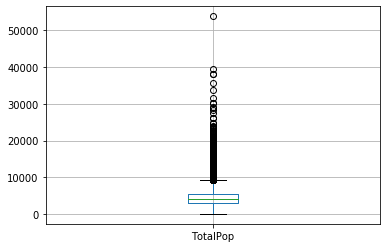

In [15]:
#Outliers
#Total Population
data2015.boxplot(column = "TotalPop")


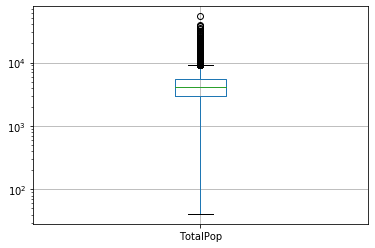

In [16]:
#Total Pop is skewed, so we can examine it logged as well
#Any measure of population will follow a similar skew
data2015.boxplot(column = "TotalPop").set_yscale('log')


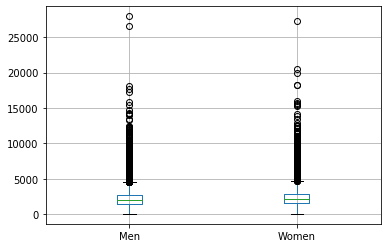

In [17]:
#Men and Women are both total counts and will skew like total population
#Men and Women Columns
data2015.boxplot(column = ["Men","Women"])

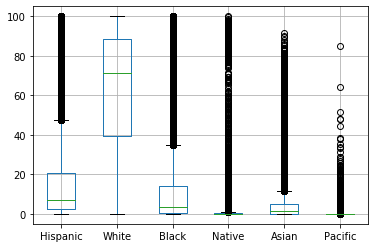

In [18]:
#Racial Column Comparsions
data2015.boxplot(column = ["Hispanic","White","Black","Native","Asian","Pacific"])


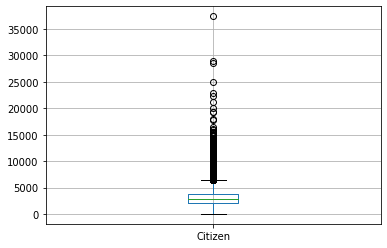

In [19]:
#Citizen Column
#Perct Citizen of Total Pop may be a better function of this. 
data2015.boxplot("Citizen")

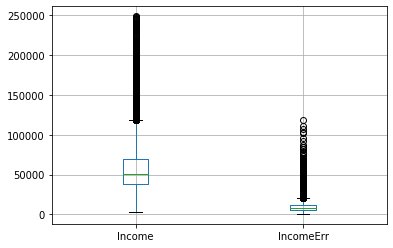

In [20]:
#Income Column
#Calculated  column combining the two may be helpful , maybe max (income + incomeerr) and min (income - err)
#Income reflects household income
data2015.boxplot(["Income", "IncomeErr"])

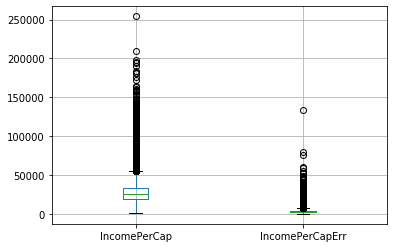

In [21]:
#Incomes per cap
#Reflects per person incomes
data2015.boxplot(["IncomePerCap", "IncomePerCapErr"])

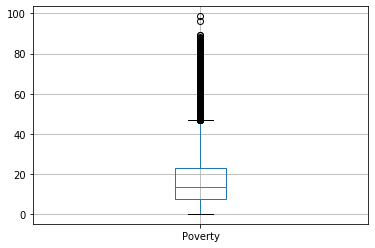

In [22]:
#Poverty 
data2015.boxplot("Poverty")

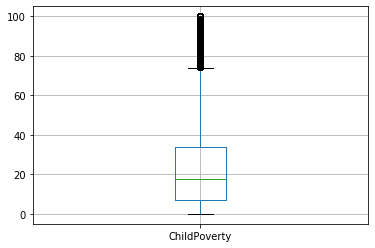

In [23]:
#Child Poverty
data2015.boxplot("ChildPoverty")

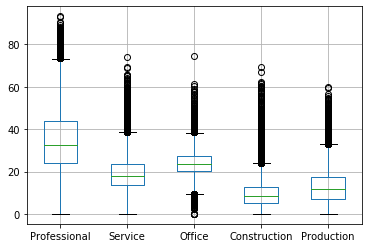

In [24]:
#Types of Jobs Columns
data2015.boxplot(["Professional","Service","Office","Construction","Production"])

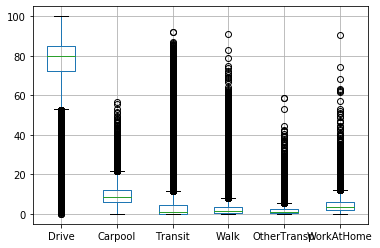

In [25]:
#Types of Transportations

data2015.boxplot(["Drive","Carpool","Transit","Walk","OtherTransp","WorkAtHome"])

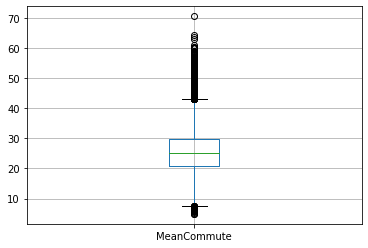

In [26]:
#Mean Commute Time
data2015.boxplot("MeanCommute")

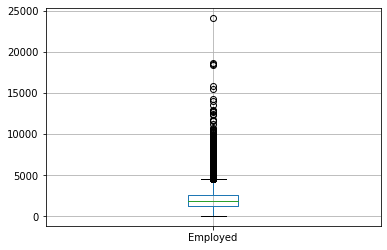

In [27]:
data2015.boxplot(column=["Employed"])

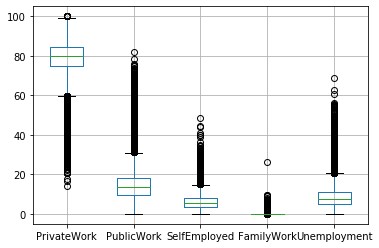

In [28]:
data2015.boxplot(["PrivateWork","PublicWork","SelfEmployed","FamilyWork","Unemployment"])

#### Plotted Outlier Analysis
With variables plotted, we can explore a few outlier portions.

There are a few dozen tracts with high incomes in locations that are not surprising. 

There are also several tracts with larger populations than most the spread, likely in census tracts that have grown since they were last assigned. 


In [29]:
#Check on Some Outliers

data2015[data2015["Income"] > 230000]

#High incomes show up in expected places, DC, LA, Silicon Valley, Connecticut, NYC etc. 

CensusTract                 State                County  TotalPop  \
5563    6037262400            California           Los Angeles      3030   
6842    6037700600            California           Los Angeles      4998   
7634    6059062643            California                Orange      7120   
10297   6081605700            California             San Mateo      5392   
10368   6081611400            California             San Mateo      4419   
10378   6081612700            California             San Mateo      2113   
10384   6081613400            California             San Mateo      3244   
10696   6085507002            California           Santa Clara      2956   
12868   9001010201           Connecticut             Fairfield      3344   
12913   9001035300           Connecticut             Fairfield      4030   
12937   9001045101           Connecticut             Fairfield      4275   
13929  11001000901  District of Columbia  District of Columbia      7790   
17886  12109020708               Florida             St. Johns      3241   
30484  24031700608              Maryland            Montgomery      5858   
30672  24031706008              Maryland            Montgomery      5070   
30673  24031706009              Maryland            Montgomery      5359   
45713  36061013000              New York              New York      3277   
45724  36061014200              New York              New York      4467   
48009  36119009800              New York           Westchester      4610   
62889  48113013300                 Texas                Dallas      2072   
63180  48113019700                 Texas                Dallas      1740   
64278  48201411200                 Texas                Harris      1823   
64353  48201430600                 Texas                Harris      3842   
68119  51059470100              Virginia               Fairfax      2913   
68136  51059480100              Virginia               Fairfax      4354   
68137  51059480201              Virginia               Fairfax      4500   

        Men  Women  Hispanic  White  Black  Native  ...  OtherTransp  \
5563   1478   1552       6.2   81.5    0.7     0.0  ...          1.0   
6842   2373   2625       8.3   85.9    0.8     0.1  ...          1.1   
7634   3699   3421       3.7   67.1    0.0     0.4  ...          2.0   
10297  2823   2569       4.8   64.0    1.4     0.0  ...          1.8   
10368  2202   2217       5.3   78.9    0.3     0.0  ...          1.4   
10378  1002   1111       4.0   87.9    0.0     0.0  ...          4.8   
10384  1611   1633       7.5   86.3    0.0     0.0  ...          2.5   
10696  1618   1338       5.3   76.0    2.4     0.0  ...          2.2   
12868  1650   1694       6.8   83.2    4.3     0.0  ...          1.7   
12913  1964   2066       6.1   88.2    0.1     0.0  ...          2.2   
12937  2147   2128       1.1   91.1    0.6     0.1  ...          0.4   
13929  3273   4517      12.0   72.8    7.7     0.0  ...          6.0   
17886  1603   1638       4.4   88.4    3.1     0.8  ...          0.6   
30484  2901   2957       8.4   54.3    1.5     0.0  ...          1.3   
30672  2458   2612       3.3   75.4    0.3     0.0  ...          3.6   
30673  2724   2635       5.8   76.8    2.8     0.0  ...          2.8   
45713  1407   1870       4.8   89.5    0.4     0.0  ...         15.3   
45724  1862   2605       4.9   88.1    0.2     0.8  ...         18.9   
48009  2124   2486       5.9   81.3    0.5     0.0  ...          2.6   
62889  1025   1047       4.7   83.6    2.3     0.0  ...          5.3   
63180   873    867       5.6   89.9    0.0     0.3  ...          0.0   
64278   888    935       5.1   87.1    0.3     0.0  ...          0.0   
64353  1901   1941       6.9   76.4    0.4     0.0  ...          2.1   
68119  1471   1442       9.0   72.0    2.5     0.0  ...          5.0   
68136  2074   2280       3.2   81.4    2.5     0.0  ...          0.6   
68137  2181   2319       1.9   73.4    3.6     0.0  ...          0.0   

       Wo

In [30]:
data2015[data2015["TotalPop"]>30000]
#Couple really high density Tracts 


CensusTract         State      County  TotalPop    Men  Women  \
9724    6073018700    California   San Diego     39454  27962  11492   
16886  12095016730       Florida      Orange     30258  14659  15599   
18070  12115002712       Florida    Sarasota     35527  17250  18277   
18180  12119911200       Florida      Sumter     38169  17638  20531   
50374  38017040500  North Dakota        Cass     30256  14321  15935   
62174  48039660602         Texas    Brazoria     33655  15473  18182   
63652  48157672900         Texas   Fort Bend     38137  18139  19998   
63656  48157673101         Texas   Fort Bend     53812  26562  27250   
65439  48339692001         Texas  Montgomery     31493  15813  15680   

       Hispanic  White  Black  Native  ...  OtherTransp  WorkAtHome  \
9724       23.0   60.5    9.3     1.1  ...          2.0        11.7   
16886      35.1   46.8    7.7     0.0  ...          1.9        12.7   
18070       8.5   78.1    9.3     0.1  ...          2.2         2.4   
18180       1.4   96.0    1.3     0.0  ...          8.0        19.5   
50374       1.5   93.7    1.4     0.7  ...          0.7         3.4   
62174      22.8   27.1   28.2     0.0  ...          1.4         0.5   
63652      23.9   22.2   28.5     0.0  ...          1.3         3.4   
63656      18.5   53.9    7.0     1.0  ...          2.2         6.4   
65439      17.0   71.8    6.3     0.0  ...          0.5         5.6   

       MeanCommute  Employed  PrivateWork  PublicWork  SelfEmployed  \
9724          12.3      3548         41.4        55.7           2.9   
16886         30.5     15521         83.2        13.9           2.8   
18070         29.5     13962         81.5        13.8           4.4   
18180         23.2      5407         80.4        10.8           8.9   
50374         17.8     18538         85.1        11.8           3.1   
62174         35.1     18425         80.4        16.0           3.6   
63652         38.5     18577         82.4        14.7           2.4   
63656         36.5     24075         82.2        12.3           5.2   
65439         34.5     15828         89.0         8.8           2.2   

       FamilyWork  Unemployment     PovertyClass  
9724          0.0          15.5  Average Poverty  
16886         0.0           6.1      Low Poverty  
18070         0.2           7.1     High Poverty  
18180         0.0           8.0      Low Poverty  
50374         0.0           2.3      Low Poverty  
62174         0.0           2.3      Low Poverty  
63652         0.5           6.7      Low Poverty  
63656         0.3           3.0      Low Poverty  
65439         0.0           3.8      Low Poverty  

[9 rows x 39 columns]

## **Simple Statistics**

###data2015

This is the original data set that has been only imported into our notebook. The original data set looks very simple however, upon closer investigation you see that a large portion of the variables are percentages (ethnicities, job functions, work types, and transit functions). Therefore, we saw very low numbers compared to the few variables that are not percentages (TotalPop, Men, Women, income variables, and citizen). Because of this fact it is a little harder to easily surface information that is comparable. We quickly made the decision to have an aggregate data set that we created and we review in the next section.

In [31]:
#Glance at top records of data2015 dataset
#data2015.head()

In [32]:
#Glance at simple statistics of data2015 dataset
data2015.describe()

CensusTract      TotalPop           Men         Women      Hispanic  \
count  7.267100e+04  72671.000000  72671.000000  72671.000000  72671.000000   
mean   2.837860e+10   4384.921757   2154.407191   2230.514566     16.876568   
std    1.644041e+10   2087.444919   1049.758408   1072.290816     22.949774   
min    1.001020e+09     41.000000     16.000000     25.000000      0.000000   
25%    1.305100e+10   2945.000000   1435.000000   1490.000000      2.400000   
50%    2.804700e+10   4099.000000   2003.000000   2086.000000      7.000000   
75%    4.200341e+10   5468.000000   2686.000000   2788.000000     20.500000   
max    7.215375e+10  53812.000000  27962.000000  27250.000000    100.000000   

              White         Black        Native         Asian       Pacific  \
count  72671.000000  72671.000000  72671.000000  72671.000000  72671.000000   
mean      62.058512     13.242913      0.723192      4.587505      0.143807   
std       30.680182     21.755275      4.464443      8.791474      1.025424   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       39.400000      0.700000      0.000000      0.200000      0.000000   
50%       71.400000      3.700000      0.000000      1.400000      0.000000   
75%       88.400000     14.300000      0.400000      4.800000      0.000000   
max      100.000000    100.000000    100.000000     91.300000     84.700000   

       ...          Walk   OtherTransp    WorkAtHome   MeanCommute  \
count  ...  72671.000000  72671.000000  72671.000000  72671.000000   
mean   ...      3.002586      1.880712      4.320224     25.690735   
std    ...      5.296029      2.511043      3.649345      6.932892   
min    ...      0.000000      0.000000      0.000000      4.900000   
25%    ...      0.400000      0.400000      1.800000     20.900000   
50%    ...      1.400000      1.200000      3.500000     25.000000   
75%    ...      3.400000      2.500000      5.900000     29.800000   
max    ...     90.900000     58.600000     90.600000     70.500000   

           Employed   PrivateWork    PublicWork  SelfEmployed    FamilyWork  \
count  72671.000000  72671.000000  72671.000000  72671.000000  72671.000000   
mean    2016.064372     79.013031     14.592550      6.224784      0.170020   
std     1053.626941      8.124464      7.354501      3.840234      0.456224   
min       20.000000     14.100000      0.000000      0.000000      0.000000   
25%     1280.000000     74.600000      9.600000      3.600000      0.000000   
50%     1867.000000     80.100000     13.400000      5.500000      0.000000   
75%     2568.000000     84.600000     18.200000      8.100000      0.000000   
max    24075.000000    100.000000     81.800000     48.600000     26.500000   

       Unemployment  
count   72671.00000  
mean        9.00716  
std         5.79766  
min         0.00000  
25%         5.10000  
50%         7.70000  
75%        11.30000  
max        68.80000  

[8 rows x 36 columns]

###data2015agg

This data set contains manipulated data variables that are aggregate values and have replaced all the original data variables that were percentage. This allowed us to visualize the data in a different way and compare all the metrics more easily to each other.
 
Upon reviewing, we see a large dataset containing many variables that are nicely distributed between their quartiles. It is interesting to review the ethnic variables and see that there is a stark difference between the mean white and any other listed race. We also noted that the Other category actually contains a negative value. Since this is a calculated field we will need to review this metric.
 
We also observed that while we can have extreme poverty there is never a zero income. There are also many income variables and it will be important for us to review these in more detail to make sure we are not receiving duplicate information from different variables. The poverty variable has been transitioned into a poverty class variable and will need to be dropped in order not to affect modeling negatively.

In [33]:
#Glance at top records of data2015agg dataset
#data2015agg.head()

In [34]:
#Glance at simple statistics of data2015agg dataset
data2015agg.describe()

CensusTract      TotalPop           Men         Women      Hispanic  \
count  7.400100e+04  74001.000000  74001.000000  74001.000000  73311.000000   
mean   2.839113e+10   4325.591465   2127.648816   2197.942649    788.132699   
std    1.647593e+10   2129.306903   1072.332031   1095.730931   1255.328559   
min    1.001020e+09      0.000000      0.000000      0.000000      0.000000   
25%    1.303901e+10   2891.000000   1409.000000   1461.000000     86.340500   
50%    2.804700e+10   4063.000000   1986.000000   2066.000000    279.946000   
75%    4.200341e+10   5442.000000   2674.000000   2774.000000    878.063000   
max    7.215375e+10  53812.000000  27962.000000  27250.000000  24793.824000   

              White         Black        Native         Asian       Pacific  \
count  73311.000000  73311.000000  73311.000000  73311.000000  73311.000000   
mean    2691.042967    529.087169     28.346627    219.016979      6.813628   
std     1863.072136    899.314732    177.745477    477.004349     49.873643   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%     1302.417500     28.410000      0.000000      5.952000      0.000000   
50%     2513.583000    151.532000      0.000000     53.810000      0.000000   
75%     3792.314000    607.872500     15.344000    213.454000      0.000000   
max    36642.240000  18414.819000   9413.376000  12179.565000   3441.480000   

       ...          Walk   OtherTransp    WorkAtHome   MeanCommute  \
count  ...  73204.000000  73204.000000  73204.000000  73052.000000   
mean   ...    121.903956     79.274379    188.919846     25.667357   
std    ...    262.846834    117.054397    197.142883      6.964881   
min    ...      0.000000      0.000000      0.000000      1.200000   
25%    ...     15.951750     13.904250     66.160500     20.800000   
50%    ...     56.655000     45.408500    139.366500     25.000000   
75%    ...    133.058250    102.729750    252.768000     29.800000   
max    ...  14085.078000   4719.780000   8841.654000     80.000000   

           Employed   PrivateWork    PublicWork  SelfEmployed    FamilyWork  \
count  74001.000000  73194.000000  73194.000000  73194.000000  73194.000000   
mean    1983.907366   3458.542418    638.428179    265.651537      7.123717   
std     1073.429808   1707.295780    476.396212    199.054994     19.632387   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%     1249.000000   2283.739250    330.977000    127.602500      0.000000   
50%     1846.000000   3225.138000    529.412000    222.513500      0.000000   
75%     2553.000000   4344.306000    814.078500    353.758500      0.000000   
max    24075.000000  44233.464000  21975.878000   4284.776000    852.240000   

       Unemployment  
count  73199.000000  
mean     378.757127  
std      280.646267  
min        0.000000  
25%      186.801000  
50%      312.120000  
75%      493.263500  
max     6115.370000  

[8 rows x 36 columns]

## **Visualize Attributes**

In [35]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

## **Explore Joint Attributes**

When exploring joint attributes our goal is to surface any important relationships between our independent variables. We started by obtaining a birdseye view of our continuous variables. We leveraged a simple scatterplot matrix with all continuous independent variables.
 
Upon first look (see scatterplot below) we can see that our vast number of numeric variables for evaluation make it impossible to gleen any useful information from our scatterplot. We can also see that it is difficult to see any trend with the color and style of the graph. Moving forward we will leverage cleaner visualziations to be able to see our variable trends more clearly.

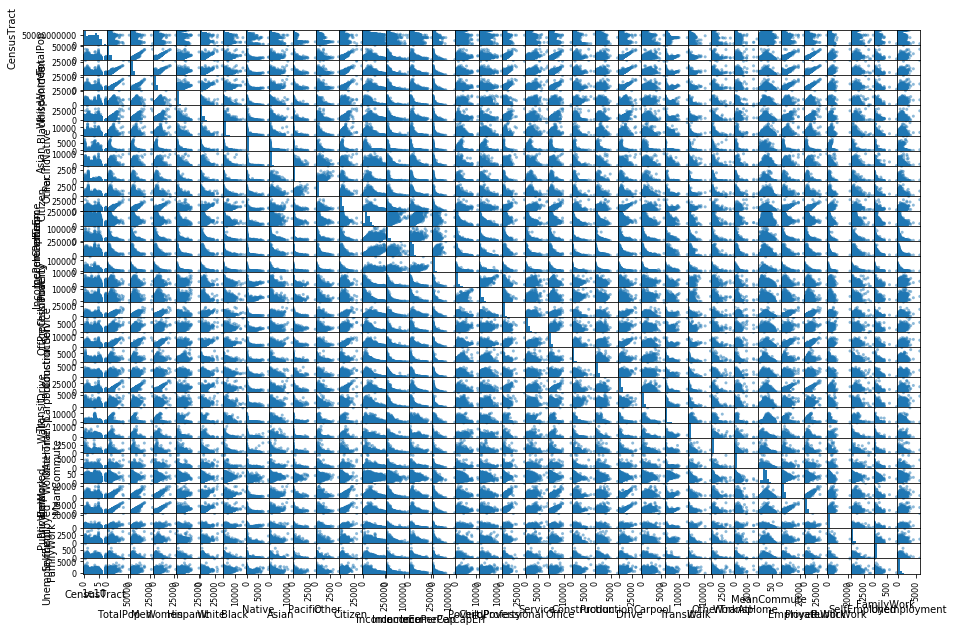

In [36]:
#Continuous Variable Scatterplot
from pandas.plotting import scatter_matrix

ax = scatter_matrix(data2015agg,figsize=(15, 10))

### Variable Clustering
As we continue to investigate the data we were able to break out our continuous variables into related groups. In order to properly evaluate these attributes against each other we needed to identify variables into these clusters and then use a pairs scatter plot for visual display of any possible linear trends. In order to supplement these scatterplots we also created linearity correlation matrices.
 
A data example: we have a group of continuous variables that are all different ethnic races. This was broken into our race cluster. Secondly we noticed that job functions was another group of related variables in the data. This was broken into our job function cluster, and so on.

NOTE: Our variable cluster comparisons are made from our aggregated data set (not the percentile data set).


1. Race Cluster
2. Job Function Cluster
3. Transportation Mode Cluster
4. Employment Cluster
5. Income Cluster
6. Additional Cluster

#### Race Variable Cluster Analysis

In [55]:
#Race Cluster dataframe creation
racecluster = data2015agg.copy()
racecluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CensusTract      74001 non-null  int64   
 1   State            74001 non-null  object  
 2   County           74001 non-null  object  
 3   TotalPop         74001 non-null  int64   
 4   Men              74001 non-null  int64   
 5   Women            74001 non-null  int64   
 6   Hispanic         73311 non-null  float64 
 7   White            73311 non-null  float64 
 8   Black            73311 non-null  float64 
 9   Native           73311 non-null  float64 
 10  Asian            73311 non-null  float64 
 11  Pacific          73311 non-null  float64 
 12  Other            73311 non-null  float64 
 13  Citizen          74001 non-null  int64   
 14  Income           72901 non-null  float64 
 15  IncomeErr        72901 non-null  float64 
 16  IncomePerCap     73261 non-null  float64

In [56]:
#racecluster df column selection
racecluster = racecluster[['Hispanic','White','Black','Native','Asian','Pacific','Other','Citizen','PovertyClass']]
racecluster.head()
racecluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Hispanic      73311 non-null  float64 
 1   White         73311 non-null  float64 
 2   Black         73311 non-null  float64 
 3   Native        73311 non-null  float64 
 4   Asian         73311 non-null  float64 
 5   Pacific       73311 non-null  float64 
 6   Other         73311 non-null  float64 
 7   Citizen       74001 non-null  int64   
 8   PovertyClass  73003 non-null  category
dtypes: category(1), float64(7), int64(1)
memory usage: 4.6 MB


In [ ]:
#Race Cluster scatter plot
#racescatter = scatter_matrix(racecluster,figsize=(15, 10))

For our race variable cluster we created the below scatterplot. This was in order to see if we could identify any linearity between the registered ethnic groups. We didn't see any immediate relationships between them, so we also included the Citizen variable that is included in the data. Once this additional variable was added into the race cluster it showed some relationships between race and citizenship. Specifically we think we see a linear correlation between multiple races and citizenship, but most strongly with white and black race groups. We decided to further investigate this with a correlation plot.

In [57]:
#Import seaborn for better scatterplot visualization
import seaborn as sns

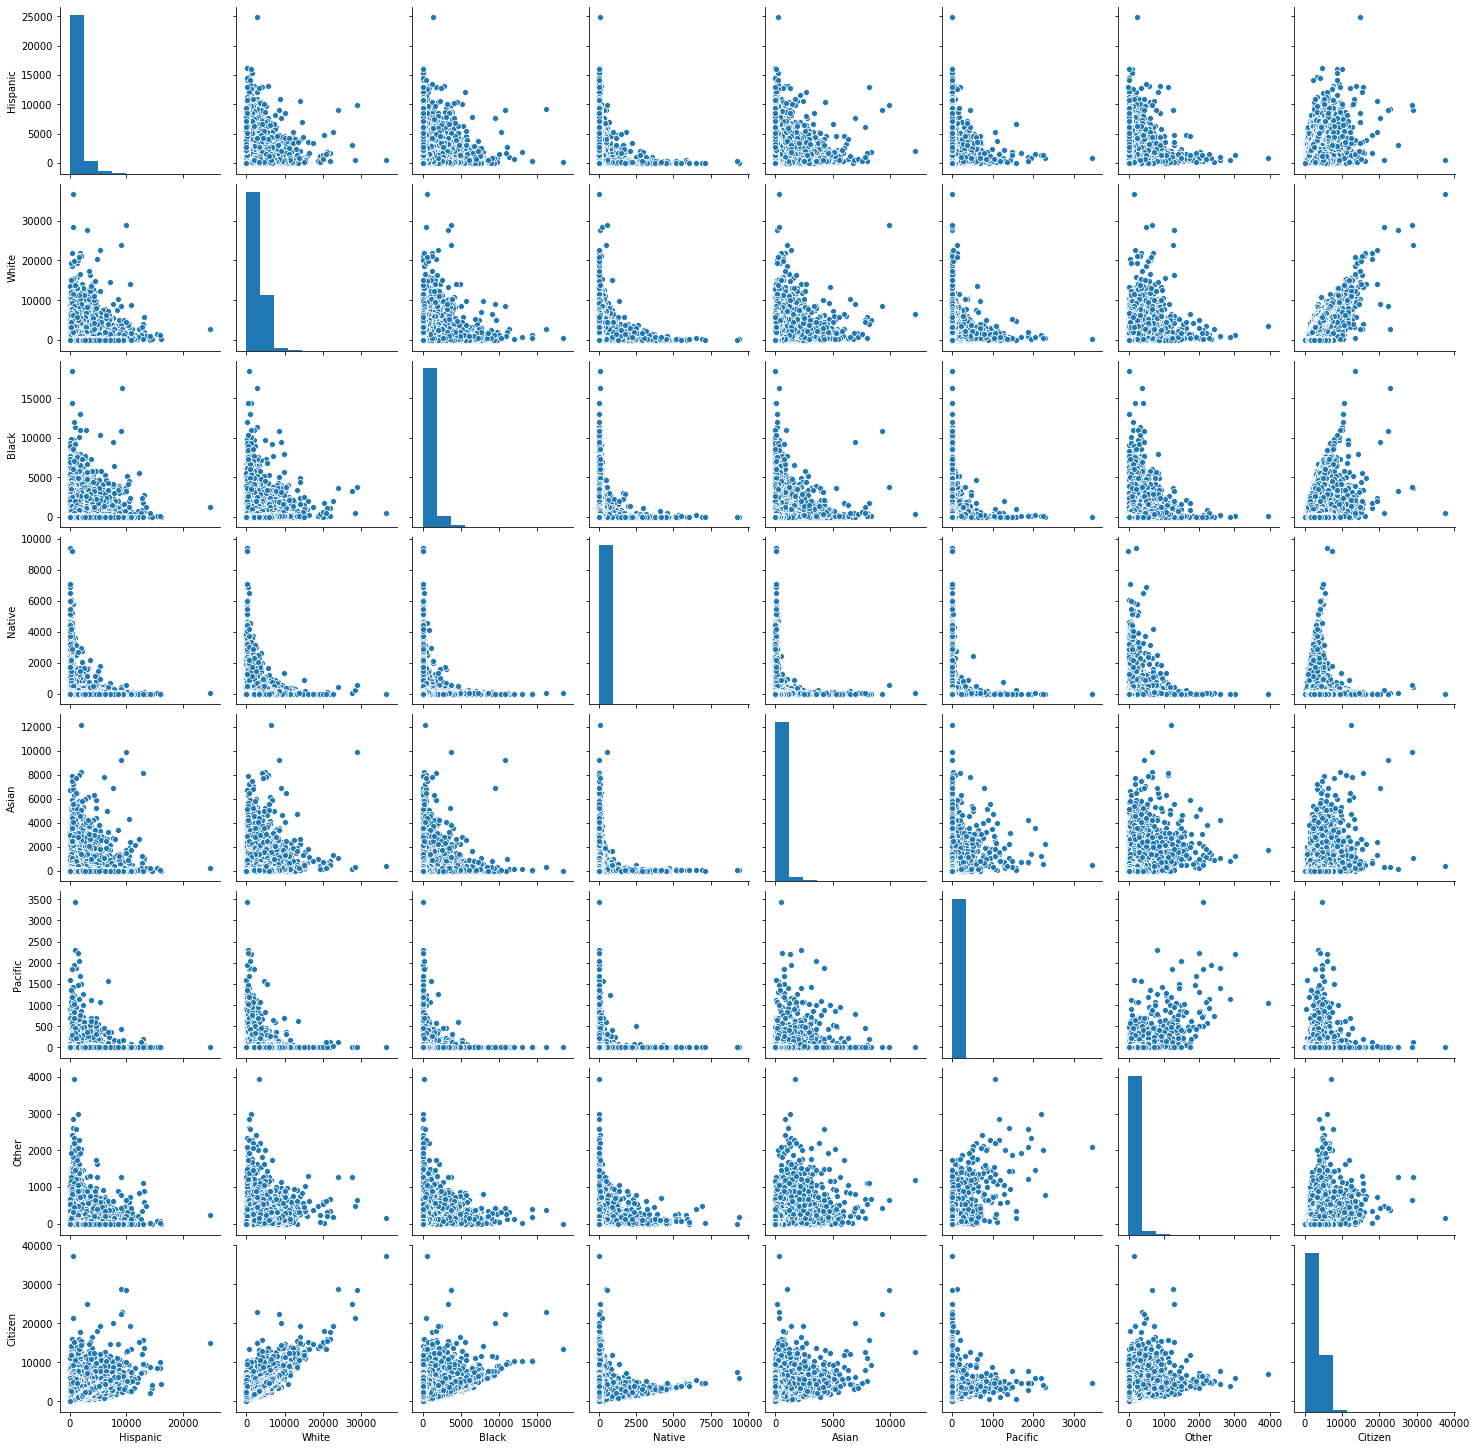

In [40]:
#Race Cluster scatter plot
racescatterSea = sns.pairplot(racecluster)

In [41]:
#this will allow plot to be embedded into the notebook
import matplotlib.pyplot as plt

In [42]:
#color mapping setup
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

For our race variable cluster correlation matrix we see that there are the strongest correlations are between citizenship and white, other, and native ethnic groups. However, all of the groups do have some correlation with citizenship.

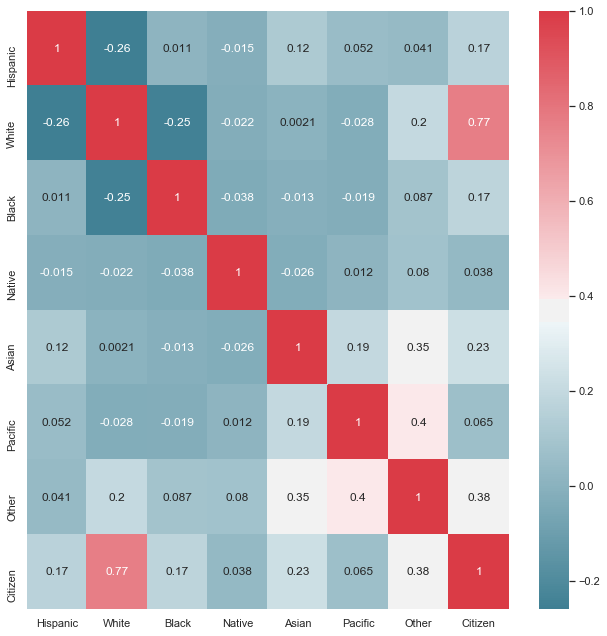

In [43]:
#Race Cluster correlation plot (multicollinearity check)
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(racecluster.corr(), cmap=cmap, annot=True)

f.tight_layout()

#### Job Cluster Variable Analysis

In [65]:
#Job Cluster dataframe creation
jobcluster = data2015agg.copy()
jobcluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CensusTract      74001 non-null  int64   
 1   State            74001 non-null  object  
 2   County           74001 non-null  object  
 3   TotalPop         74001 non-null  int64   
 4   Men              74001 non-null  int64   
 5   Women            74001 non-null  int64   
 6   Hispanic         73311 non-null  float64 
 7   White            73311 non-null  float64 
 8   Black            73311 non-null  float64 
 9   Native           73311 non-null  float64 
 10  Asian            73311 non-null  float64 
 11  Pacific          73311 non-null  float64 
 12  Other            73311 non-null  float64 
 13  Citizen          74001 non-null  int64   
 14  Income           72901 non-null  float64 
 15  IncomeErr        72901 non-null  float64 
 16  IncomePerCap     73261 non-null  float64

In [66]:
#Job Cluster df column selection
jobcluster = jobcluster[['Professional','Service','Office','Construction','Production','WorkAtHome','PovertyClass']]
jobcluster.head()
jobcluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Professional  73194 non-null  float64 
 1   Service       73194 non-null  float64 
 2   Office        73194 non-null  float64 
 3   Construction  73194 non-null  float64 
 4   Production    73194 non-null  float64 
 5   WorkAtHome    73204 non-null  float64 
 6   PovertyClass  73003 non-null  category
dtypes: category(1), float64(6)
memory usage: 3.5 MB


In [ ]:
#Job Cluster scatter plot
#jobscatter = scatter_matrix(jobcluster,figsize=(15, 10))

Our job variable scatterplot cluster we created is below. This was in order to see if we could identify any linearity between the collected job types. Upon review we see a few relationships that could easily be classified as having a positive linear relationship. Specifically we observed what appeared to be linear relationships between Professional and Office, Professional and Service, as well as WorkAtHome and numerous other job types. We investigated this further with a correlation plot.

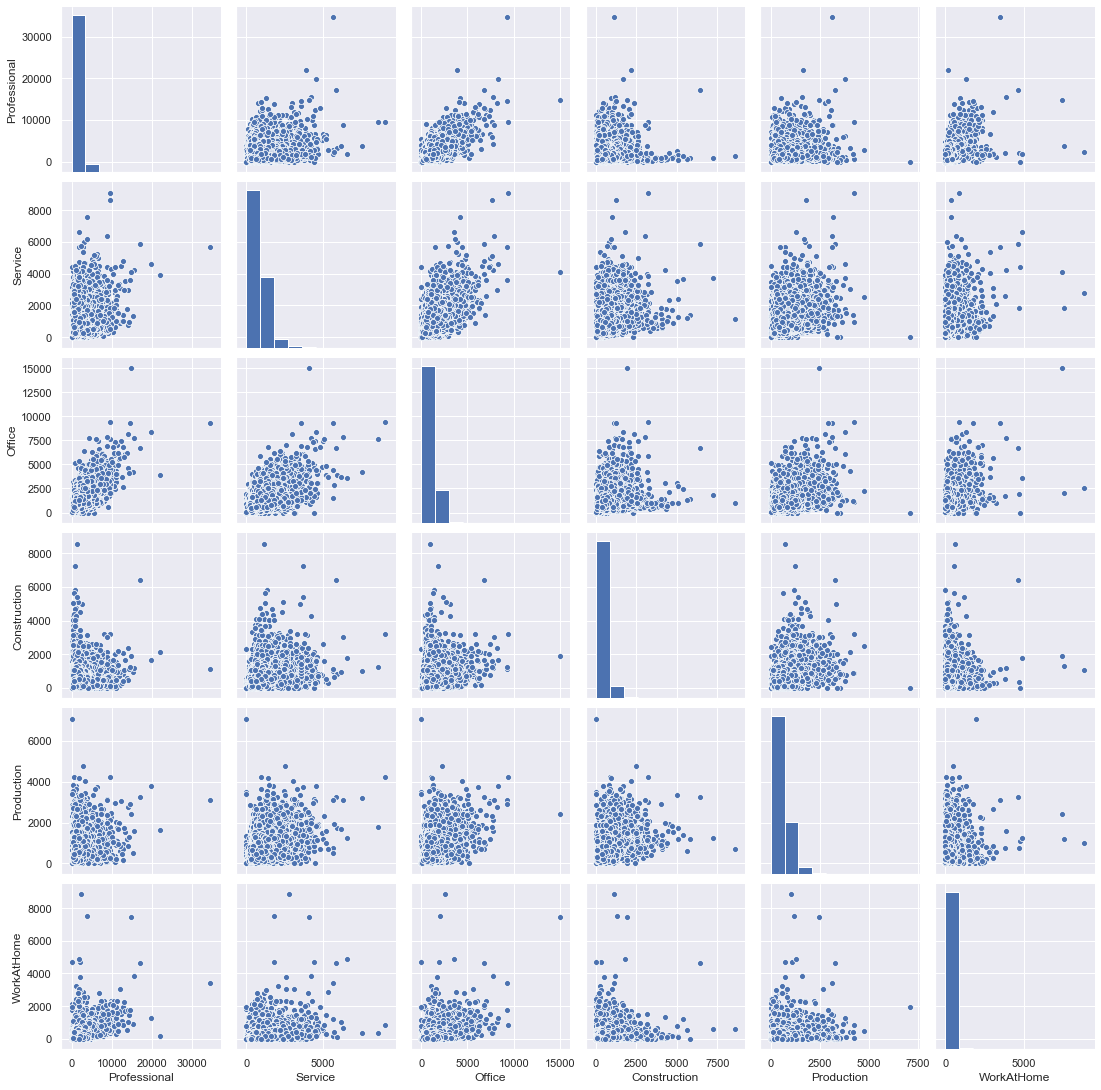

In [69]:
#Job Cluster scatter plot
jobscatterSea = sns.pairplot(jobcluster)

For our job variable cluster correlation matrix we see that there are the strongest correlations are between WorkAtHome and Professional, Professional and Office, and lastly Office and Service.While these are our strongest correlations there seems to be a clear correlation between all the variables except Production and WorkAtHome.

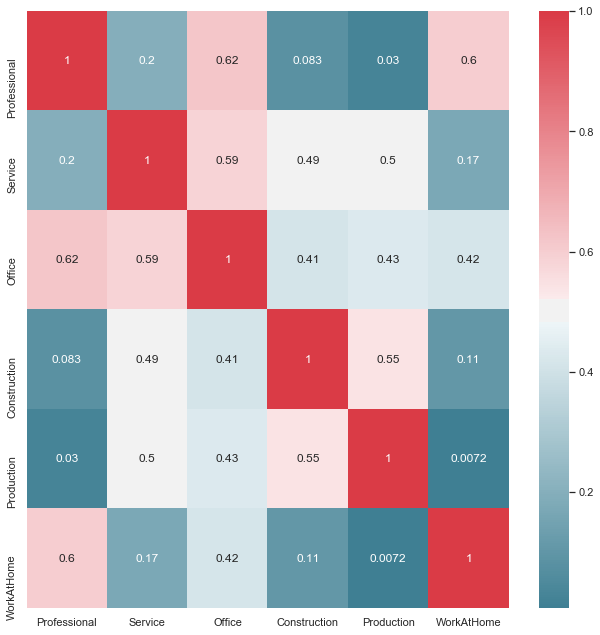

In [68]:
#Job Cluster correlation plot (multicollinearity check)
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(jobcluster.corr(), cmap=cmap, annot=True)

f.tight_layout()

#### Transportation Cluster Variable Analysis

In [59]:
#Transportation Cluster dataframe creation
transcluster = data2015agg.copy()
transcluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CensusTract      74001 non-null  int64   
 1   State            74001 non-null  object  
 2   County           74001 non-null  object  
 3   TotalPop         74001 non-null  int64   
 4   Men              74001 non-null  int64   
 5   Women            74001 non-null  int64   
 6   Hispanic         73311 non-null  float64 
 7   White            73311 non-null  float64 
 8   Black            73311 non-null  float64 
 9   Native           73311 non-null  float64 
 10  Asian            73311 non-null  float64 
 11  Pacific          73311 non-null  float64 
 12  Other            73311 non-null  float64 
 13  Citizen          74001 non-null  int64   
 14  Income           72901 non-null  float64 
 15  IncomeErr        72901 non-null  float64 
 16  IncomePerCap     73261 non-null  float64

In [60]:
#Transportation Cluster df column selection
transcluster = transcluster[['Drive','Carpool','Transit','Walk','OtherTransp','PovertyClass']]
transcluster.head()
transcluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Drive         73204 non-null  float64 
 1   Carpool       73204 non-null  float64 
 2   Transit       73204 non-null  float64 
 3   Walk          73204 non-null  float64 
 4   OtherTransp   73204 non-null  float64 
 5   PovertyClass  73003 non-null  category
dtypes: category(1), float64(5)
memory usage: 2.9 MB


In [61]:
#Transportation Cluster scatter plot
#transscatter = scatter_matrix(transcluster,figsize=(15, 10))

Our transportation variable scatterplot cluster we created is below. This was in order to see if we could identify any linearity between the collected types of commute options by individuals. Upon review we see a very few relationships that seem linearly correlated. However, one that can be called out is between Carpool and Drive. All to the other comparisons could potentially have some correlation but none that are easily identifiable through the scatterplot matrix. We confirm our assumptions with a correlation plot.

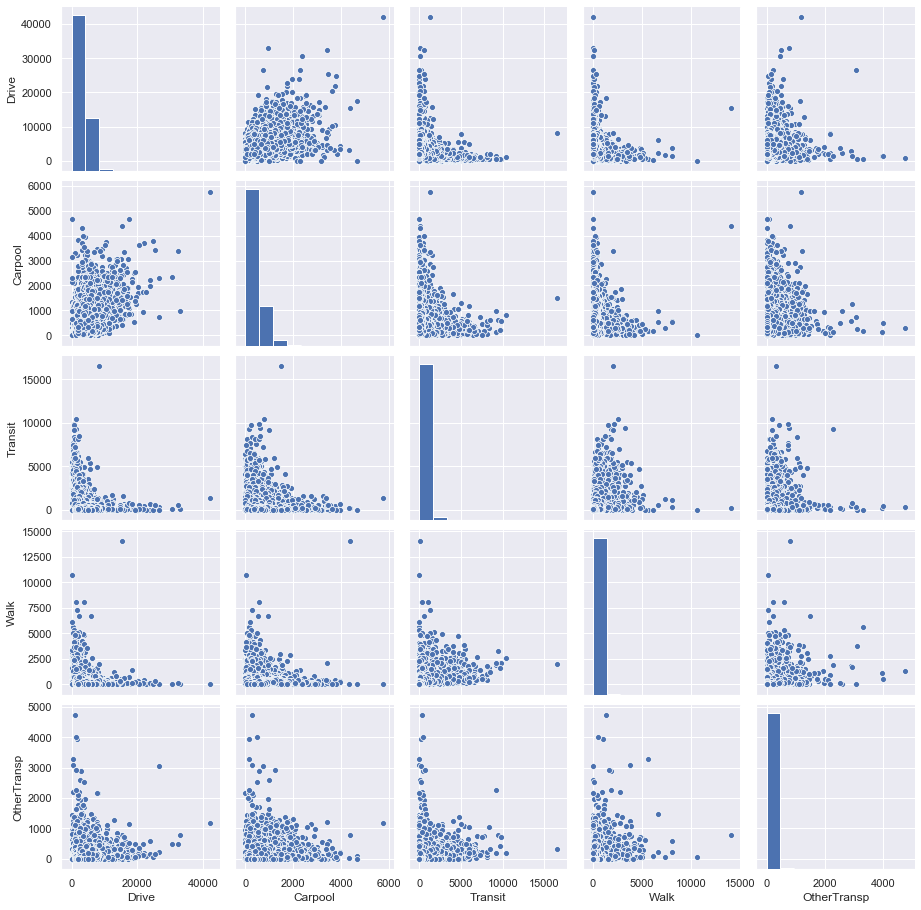

In [62]:
#Transportation Cluster scatter plot
transscatterSea = sns.pairplot(transcluster)

For our transportation variable cluster correlation matrix we see that there very few strong correlations. However, like in our scatterplot we do see one notable correlation between CarPool and Drive while the other correlation measurements are quite low.

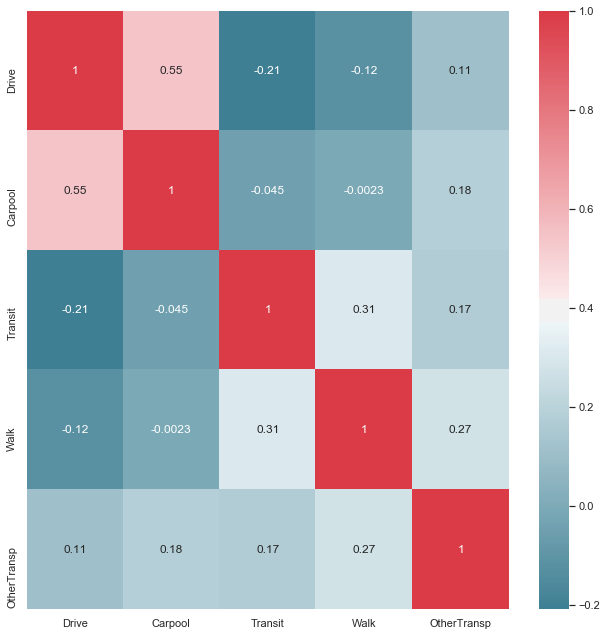

In [63]:
#Transportation Cluster correlation plot (multicollinearity check)
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(transcluster.corr(), cmap=cmap, annot=True)

f.tight_layout()

#### Employment Variable Cluster Analysis

In [51]:
#Employement Cluster dataframe creation
empcluster = data2015agg.copy()
empcluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CensusTract      74001 non-null  int64   
 1   State            74001 non-null  object  
 2   County           74001 non-null  object  
 3   TotalPop         74001 non-null  int64   
 4   Men              74001 non-null  int64   
 5   Women            74001 non-null  int64   
 6   Hispanic         73311 non-null  float64 
 7   White            73311 non-null  float64 
 8   Black            73311 non-null  float64 
 9   Native           73311 non-null  float64 
 10  Asian            73311 non-null  float64 
 11  Pacific          73311 non-null  float64 
 12  Other            73311 non-null  float64 
 13  Citizen          74001 non-null  int64   
 14  Income           72901 non-null  float64 
 15  IncomeErr        72901 non-null  float64 
 16  IncomePerCap     73261 non-null  float64

In [52]:
#Employement Cluster df column selection
empcluster = empcluster[['Employed','PrivateWork','PublicWork','SelfEmployed','FamilyWork','Unemployment','PovertyClass']]
empcluster.head()
empcluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Employed      74001 non-null  int64   
 1   PrivateWork   73194 non-null  float64 
 2   PublicWork    73194 non-null  float64 
 3   SelfEmployed  73194 non-null  float64 
 4   FamilyWork    73194 non-null  float64 
 5   Unemployment  73199 non-null  float64 
 6   PovertyClass  73003 non-null  category
dtypes: category(1), float64(5), int64(1)
memory usage: 3.5 MB


In [ ]:
#Employment Cluster scatter plot
#empscatter = scatter_matrix(empcluster,figsize=(15, 10))

For our employment variable cluster we created the below scatterplot. In this group of data we included two 'blanket' variables that would encompass many of the variables listed; these were Unemployed and Employed. When using a blanket variable such as this we can expect to see certain high correlations, and we confirm this with the scatterplots for Employed and PrivateWork as well as Employed and PublicWork. These two pairs have a visually strong correlation. What is interesting is that not more of the employment variables are strongly correlated with Employed. One would assume if you are employed in any of these listed fields you would also consider yourself Employed overall but the data doesn't seem to support this in its entirety.  We decided to further investigate this with a correlation plot.

In [ ]:
#Employed Cluster scatter plot
empscatterSea = sns.pairplot(empcluster)

For our employment variable cluster correlation matrix we see that there are a couple strong correlations and a few moderately strong correlations. We can confirm our assumptions from above and see that Employed has strong correlations with PrivateWork and PublicWork. In addition, we see a moderately strong correlation between Employed and SelfEmploye as well as Unemployed. In surfacing this contradictory information with a correlation between Unemployed and Employed there may be a collection error here we should be cautious of when building our model for classification.

In [ ]:
#Employment Cluster correlation plot (multicollinearity check)
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(empcluster.corr(), cmap=cmap, annot=True)

f.tight_layout()

#### Income Variable Cluster Analysis

In [72]:
#Income Cluster dataframe creation
inccluster = data2015agg.copy()
inccluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CensusTract      74001 non-null  int64   
 1   State            74001 non-null  object  
 2   County           74001 non-null  object  
 3   TotalPop         74001 non-null  int64   
 4   Men              74001 non-null  int64   
 5   Women            74001 non-null  int64   
 6   Hispanic         73311 non-null  float64 
 7   White            73311 non-null  float64 
 8   Black            73311 non-null  float64 
 9   Native           73311 non-null  float64 
 10  Asian            73311 non-null  float64 
 11  Pacific          73311 non-null  float64 
 12  Other            73311 non-null  float64 
 13  Citizen          74001 non-null  int64   
 14  Income           72901 non-null  float64 
 15  IncomeErr        72901 non-null  float64 
 16  IncomePerCap     73261 non-null  float64

In [73]:
#Income Cluster df column selection
inccluster = inccluster[['Income','IncomeErr','IncomePerCap', 'IncomePerCapErr', 'ChildPoverty','PovertyClass']]
inccluster.head()
inccluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Income           72901 non-null  float64 
 1   IncomeErr        72901 non-null  float64 
 2   IncomePerCap     73261 non-null  float64 
 3   IncomePerCapErr  73261 non-null  float64 
 4   ChildPoverty     72883 non-null  float64 
 5   PovertyClass     73003 non-null  category
dtypes: category(1), float64(5)
memory usage: 2.9 MB


For our income variable cluster we created the below scatterplot. Since many of the variables are income based we expect to see a high correlation between them. As we review the scatterplots below we see strong linear correlation between Income, IncomeErr, IncomePerCap, and IncomePerCapErr confirming our thoughts that these variables would be highly correlated.


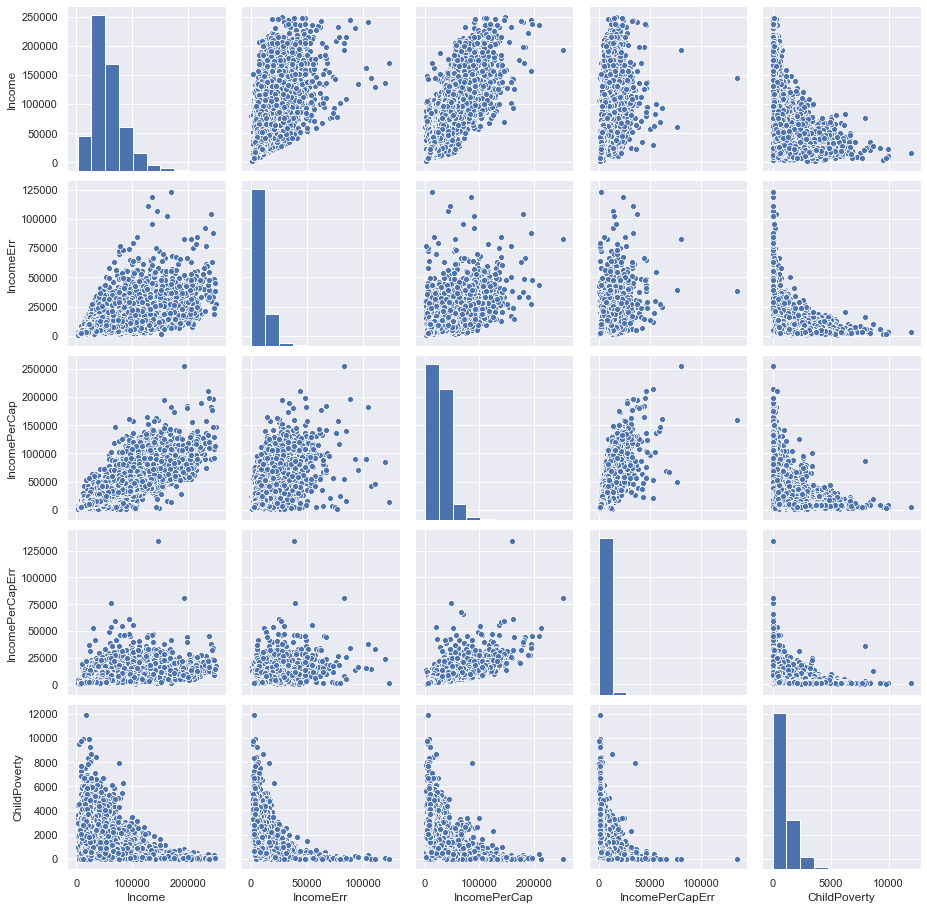

In [74]:
#Income Cluster scatter plot
incscatterSea = sns.pairplot(inccluster)

To further support our finds above we see that this correlation matrix of our income variable cluster is full of highly correlated variables. This is important to note because when reviewing this later it may be necessary to remove variables from our model that could be depicting the same information. Since we will be classifying poverty levels it's likely we would like to use IncomePerCap and IncomePerCapErr in order to help support our geographical models and checks.

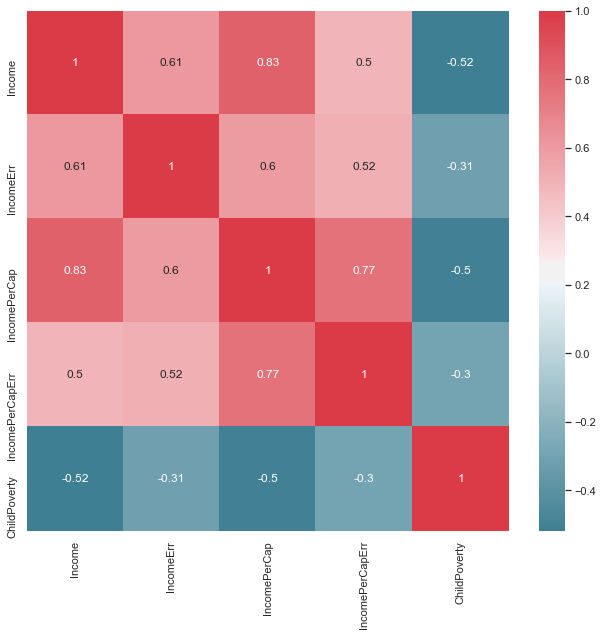

In [75]:
#Income Cluster correlation plot (multicollinearity check)
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(inccluster.corr(), cmap=cmap, annot=True)

f.tight_layout()

#### Additional Variable Cluster Analysis

In [76]:
#Additional Cluster dataframe creation
addcluster = data2015agg.copy()
addcluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CensusTract      74001 non-null  int64   
 1   State            74001 non-null  object  
 2   County           74001 non-null  object  
 3   TotalPop         74001 non-null  int64   
 4   Men              74001 non-null  int64   
 5   Women            74001 non-null  int64   
 6   Hispanic         73311 non-null  float64 
 7   White            73311 non-null  float64 
 8   Black            73311 non-null  float64 
 9   Native           73311 non-null  float64 
 10  Asian            73311 non-null  float64 
 11  Pacific          73311 non-null  float64 
 12  Other            73311 non-null  float64 
 13  Citizen          74001 non-null  int64   
 14  Income           72901 non-null  float64 
 15  IncomeErr        72901 non-null  float64 
 16  IncomePerCap     73261 non-null  float64

In [77]:
#Additional Cluster df column selection
addcluster = addcluster[['TotalPop','Men','Women', 'Citizen', 'Employed','Unemployment', 'MeanCommute','PovertyClass']]
addcluster.head()
addcluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   TotalPop      74001 non-null  int64   
 1   Men           74001 non-null  int64   
 2   Women         74001 non-null  int64   
 3   Citizen       74001 non-null  int64   
 4   Employed      74001 non-null  int64   
 5   Unemployment  73199 non-null  float64 
 6   MeanCommute   73052 non-null  float64 
 7   PovertyClass  73003 non-null  category
dtypes: category(1), float64(2), int64(5)
memory usage: 4.0 MB


The additional variable cluster we created the below scatterplot. In this variable group we include a lot of obviously related variables like Total Population versus Men or Women. The Men and Women variables would only include total population so we expect to see high correlation between those variables. Note: Total Population is expected to be correlated with any metric since all metrics were measured from the total population. The only question would be how correlated. We confirm our assumption with the scatterplot matrix below.

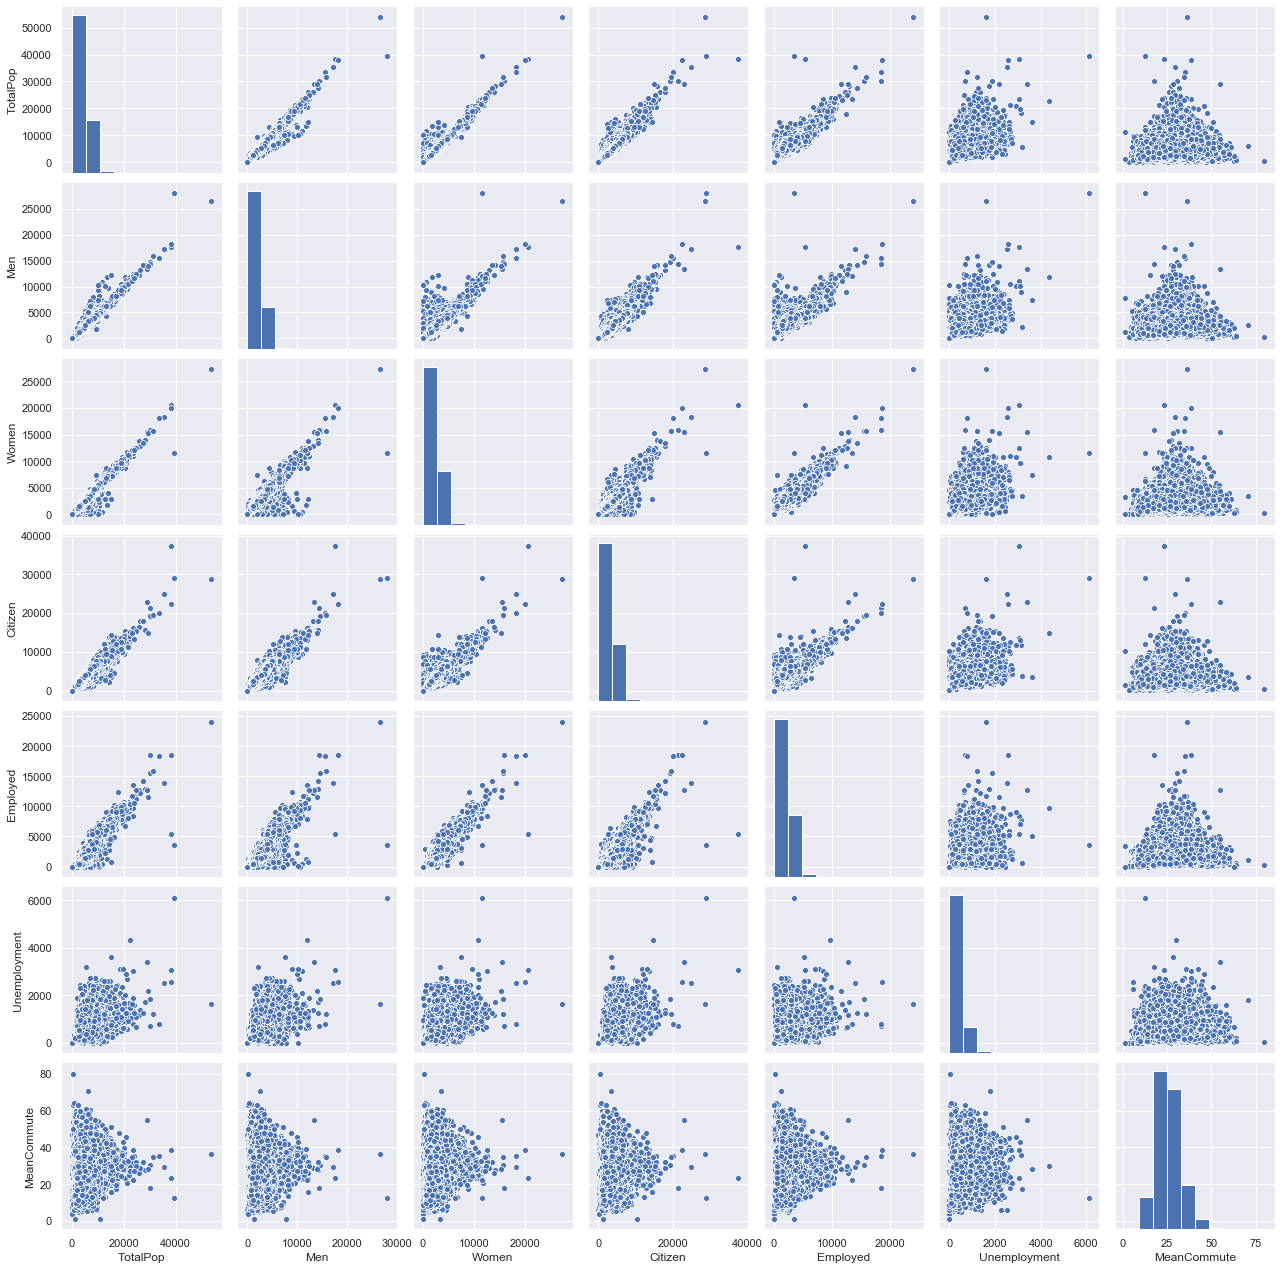

In [78]:
#Additional Cluster scatter plot
addscatterSea = sns.pairplot(addcluster)

For our additional variable cluster correlation matrix we are simply confirming the observations we made with our scatterplot matrix. As we can see below our correlation matrix does just that. There is heavy correlation between Total Population and the other variables, as expected. This is notable now as it may affect how we treat these variables farther down the line during our classification model creation.

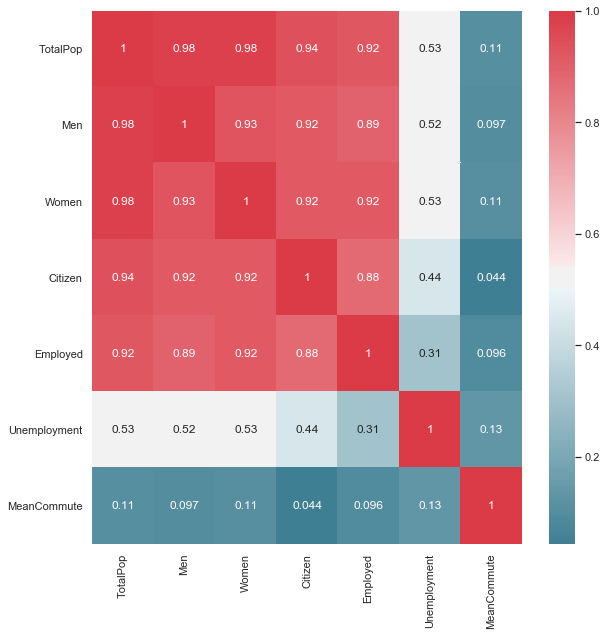

In [79]:
#Additional Cluster correlation plot (multicollinearity check)
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(addcluster.corr(), cmap=cmap, annot=True)

f.tight_layout()

## **Explore Attributes and Class**

As we continue to explore our data, we have to be sure to use our variable clusters in condition with the dependent classification variable: Poverty Class. Below we have broken out each scatterplot matrix and colored by Poverty Class to observe and trends or notable facts about our dataset.
1. Race Cluster
2. Job Function Cluster
3. Transportation Mode Cluster
4. Employment Cluster
5. Income Cluster
6. Additional Cluster

### Race Variable Cluster with Poverty Class Analysis

**REVIEW HERE**

/Users/matt/opt/anaconda3/envs/ML1/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/matt/opt/anaconda3/envs/ML1/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/matt/opt/anaconda3/envs/ML1/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/matt/opt/anaconda3/envs/ML1/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


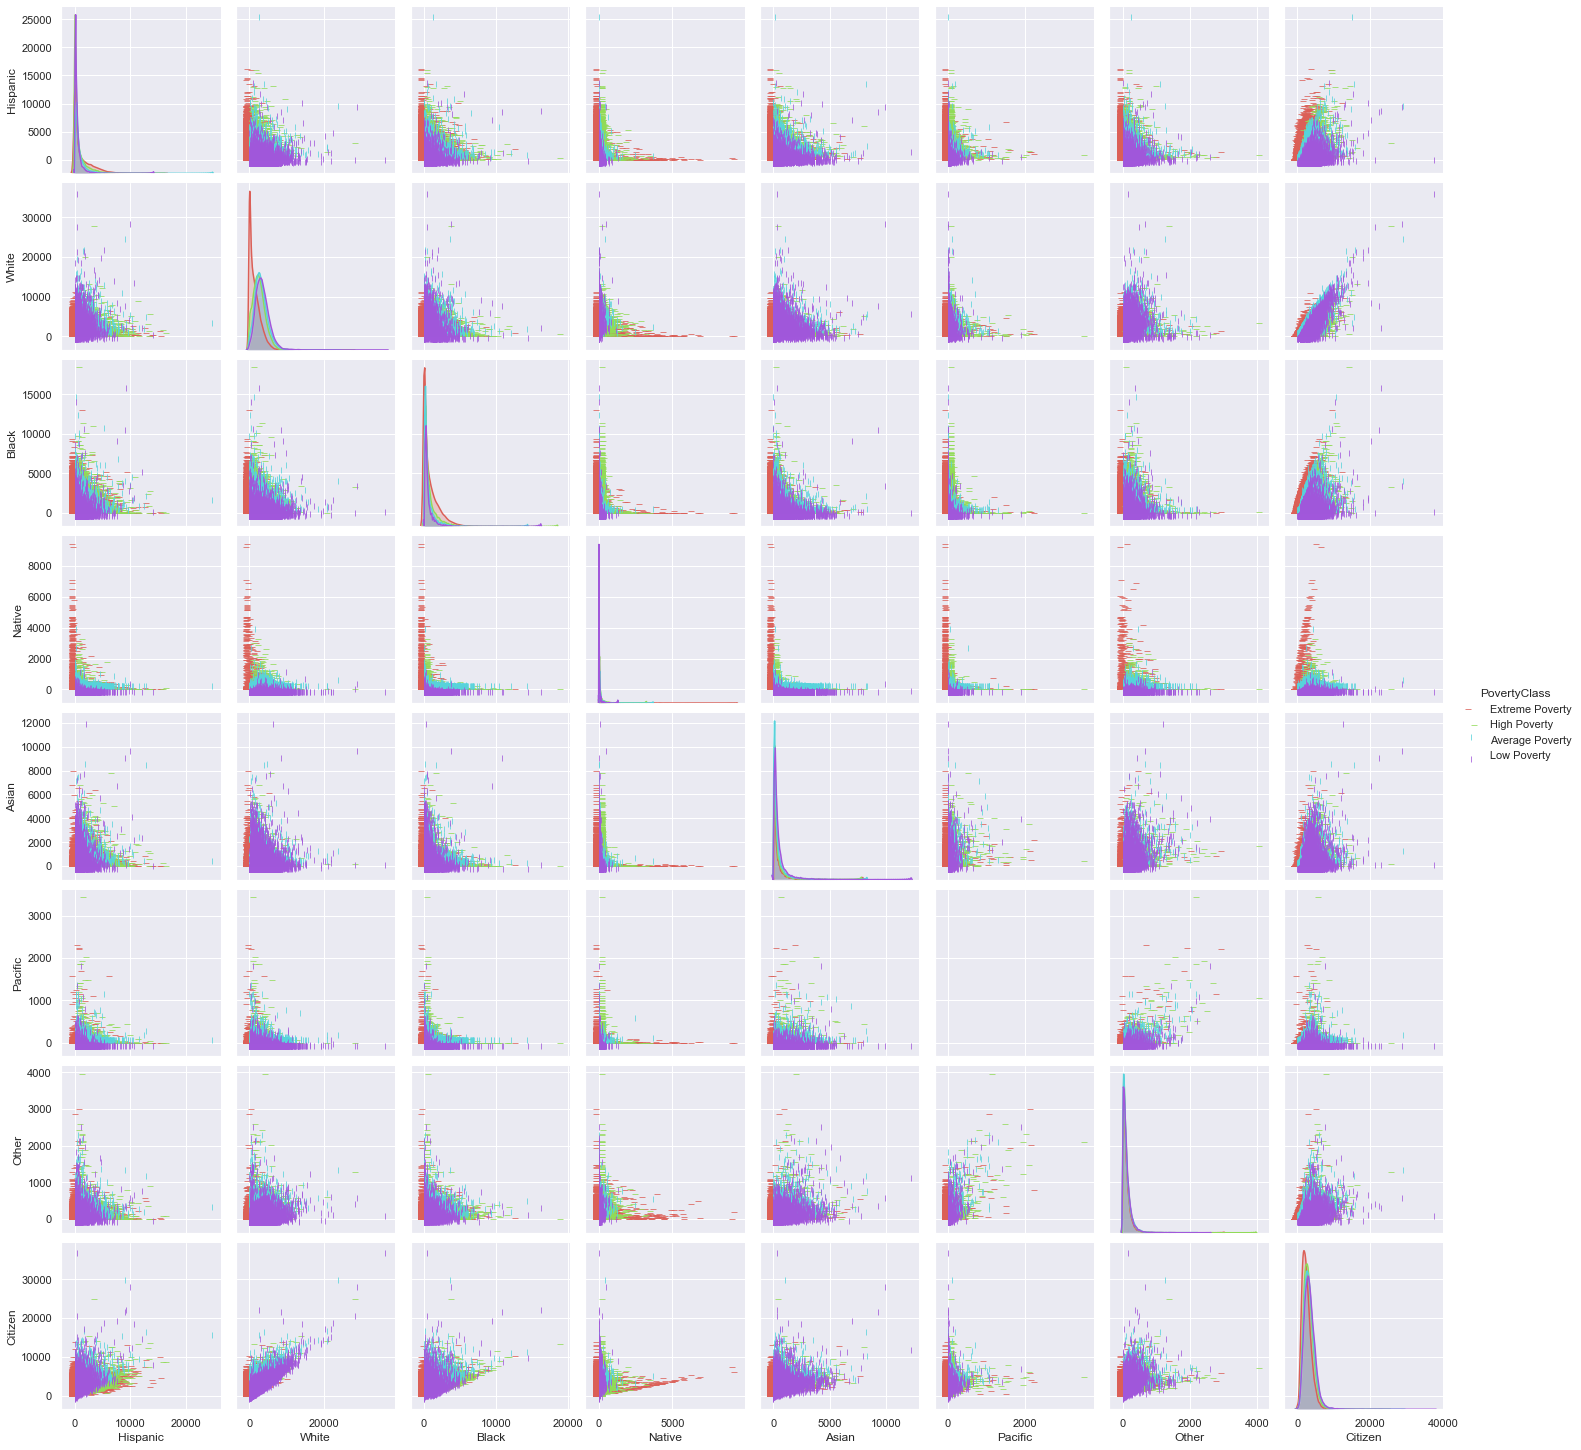

In [54]:
#Race Cluster scatterplot colored by Poverty Class
racescatterPC = sns.pairplot(racecluster, hue="PovertyClass", hue_order=["Extreme Poverty","High Poverty","Average Poverty", "Low Poverty"], palette = "hls", markers=[0, 1, 2, 3])

### Job Variable Cluster with Poverty Class Analysis

When reviewing the job variable cluster with the Poverty Class (dependent variable) as an additional component we can see that there is a lot of overlapping between the different poverty classes. An interesting thing we did surface was a higher volume of extreme poverty in the Construction and Production job variables when comparing them to the professional job category.

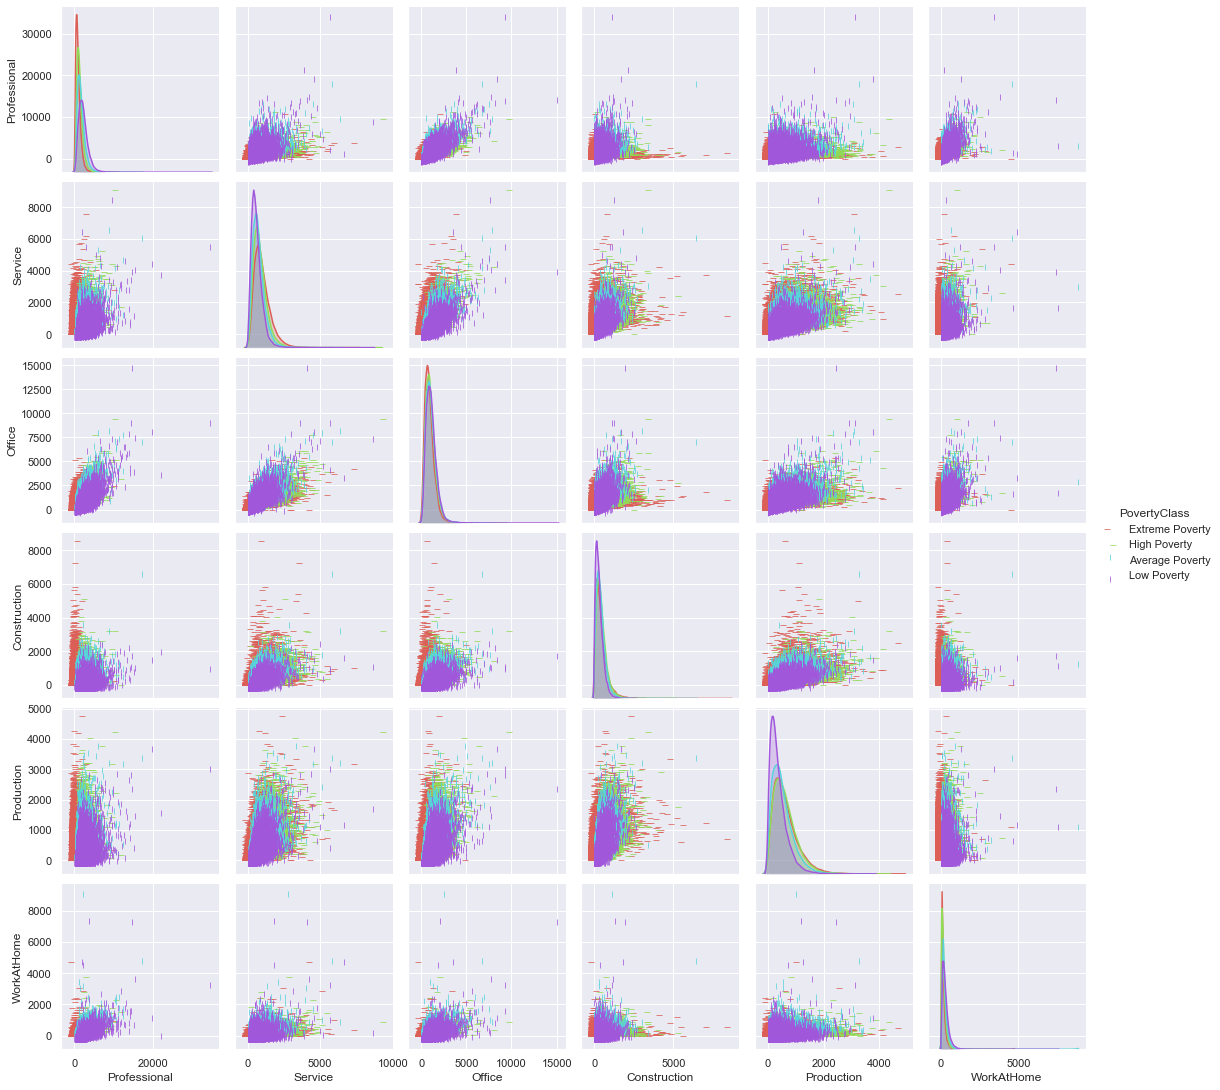

In [70]:
#Job Cluster scatterplot colored by Poverty Class
jobscatterPC = sns.pairplot(jobcluster, hue="PovertyClass", hue_order=["Extreme Poverty","High Poverty","Average Poverty", "Low Poverty"], palette = "hls", markers=[0, 1, 2, 3])

### Transportation Variable Cluster with Poverty Class Analysis

In our scatterplot that includes poverty class levels highlighted we see again there is a lot of overlapping with many of the variables. However we do see a spike in extreme poverty when looking at the transit transportation method. As well as a high poverty level spike with the walking transportation variable.

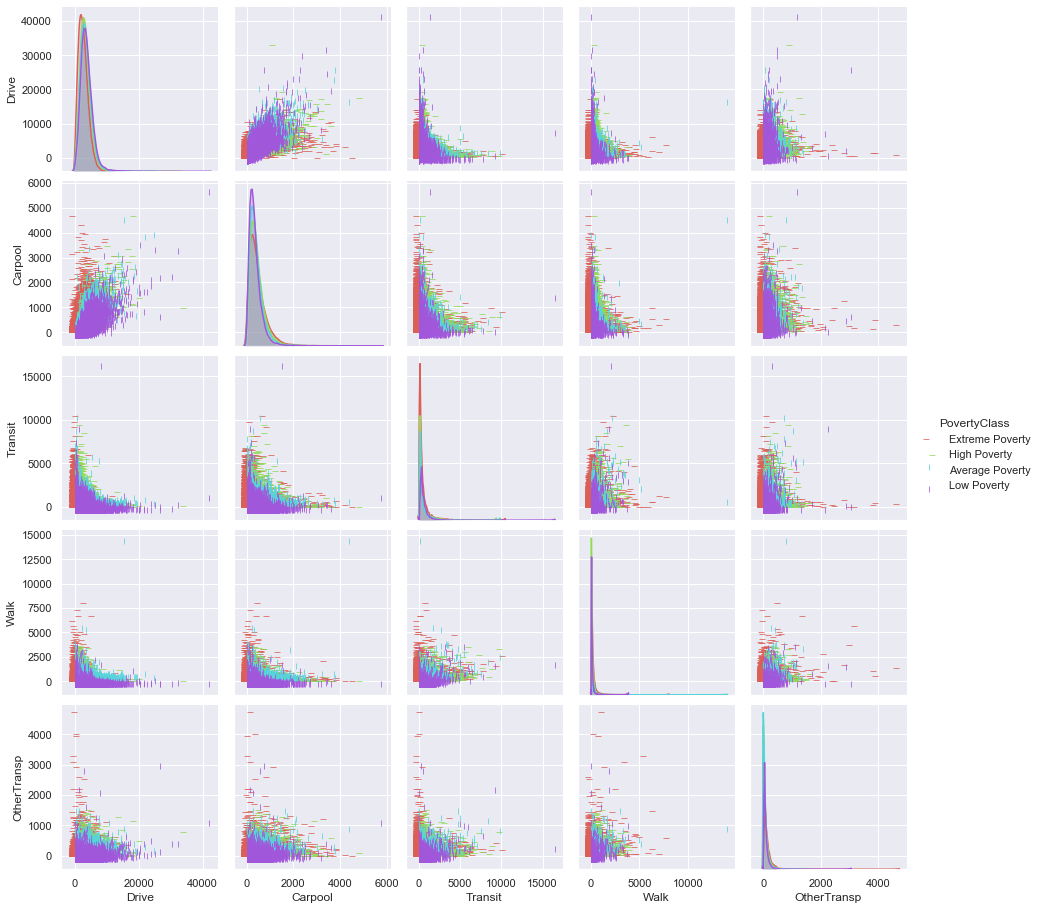

In [64]:
#Trasportation Cluster scatterplot colored by Poverty Class
transscatterPC = sns.pairplot(transcluster, hue="PovertyClass", hue_order=["Extreme Poverty","High Poverty","Average Poverty", "Low Poverty"], palette = "hls", markers=[0, 1, 2, 3])

### Employment Variable Cluster with Poverty Class Analysis

**REVIEW HERE**

/Users/matt/opt/anaconda3/envs/ML1/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/matt/opt/anaconda3/envs/ML1/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


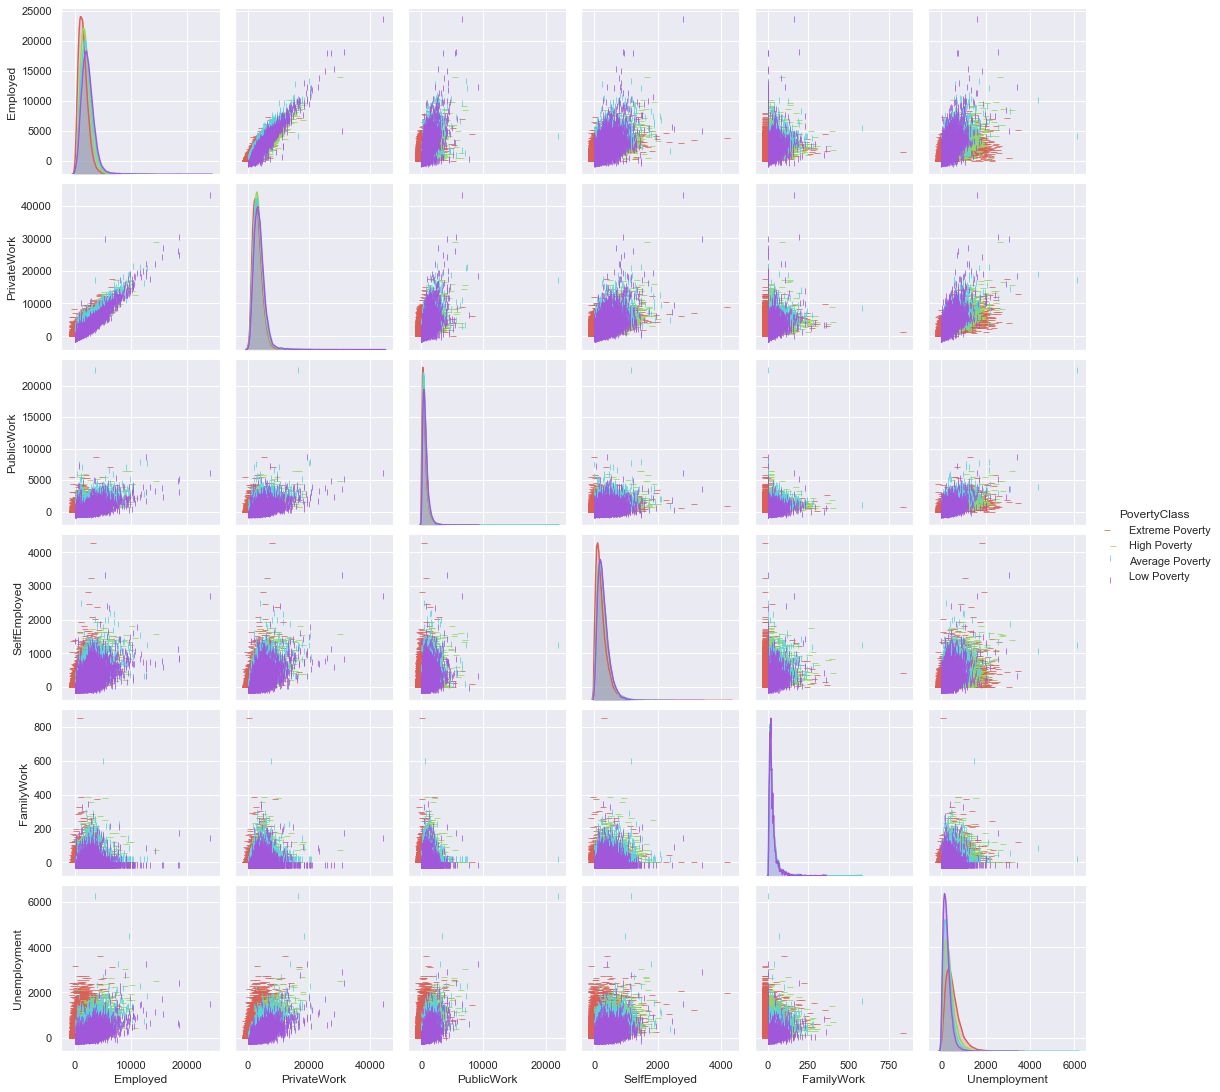

In [53]:
#Employment Cluster scatterplot colored by Poverty Class
empscatterPC = sns.pairplot(empcluster, hue="PovertyClass", hue_order=["Extreme Poverty","High Poverty","Average Poverty", "Low Poverty"], palette = "hls", markers=[0, 1, 2, 3])


### Income Variable Cluster with Poverty Class Analysis

When reviewing the income variable cluster with the poverty class levels highlighted the most notable graph is the ChildPoverty versus Income scatterplot and the strongest separation we've seen among all the scatterplots so far. We can clearly see that extreme and high poverty are more common and in high numbers when the income is lower. Indication this would be an important variable in our classification model.

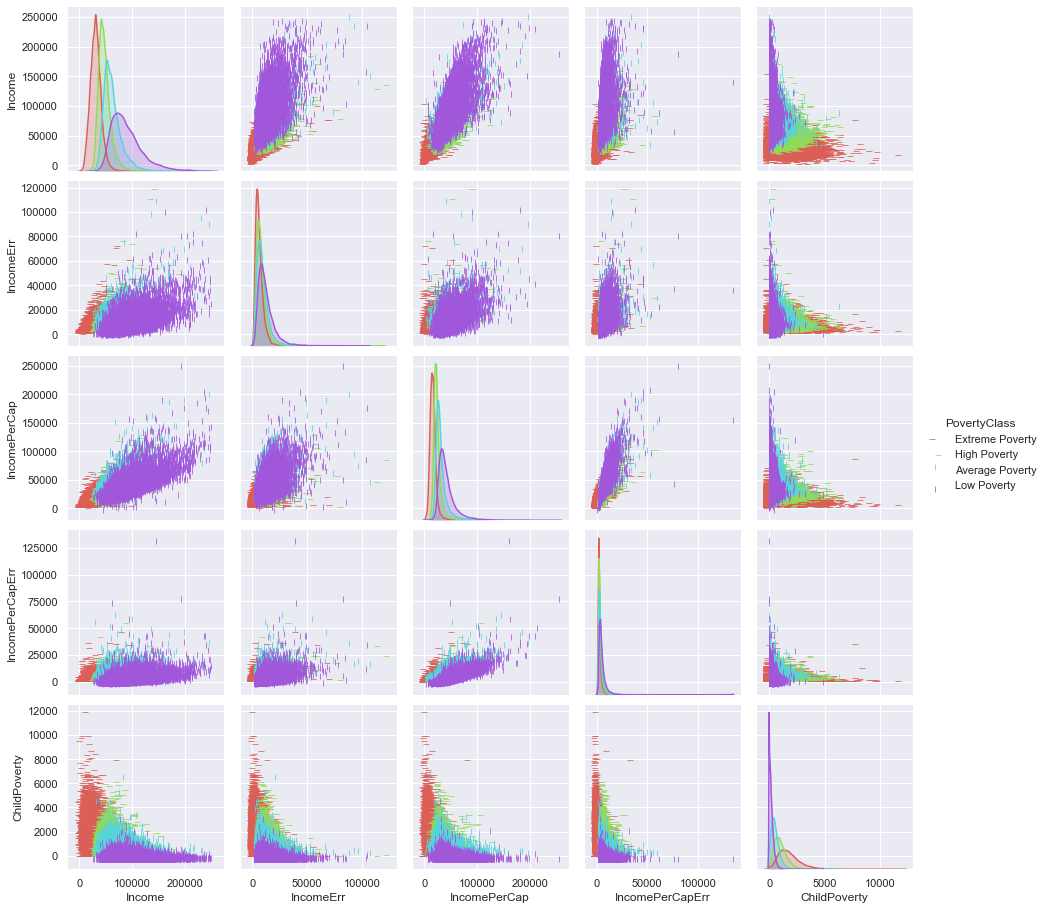

In [80]:
#Income Cluster scatterplot colored by Poverty Class
incscatterPC = sns.pairplot(inccluster, hue="PovertyClass", hue_order=["Extreme Poverty","High Poverty","Average Poverty", "Low Poverty"], palette = "hls", markers=[0, 1, 2, 3])


### Additional Variable Cluster with Poverty Class Analysis

Lastly, we reviewed the additional variable cluster with the poverty class highlighted. Again we see a lot of overlap, however it would be important to note that the Unemployment variable seems to see the most separation between the poverty levels. This would indicate this is an important variable in determining poverty level classification during our model building.

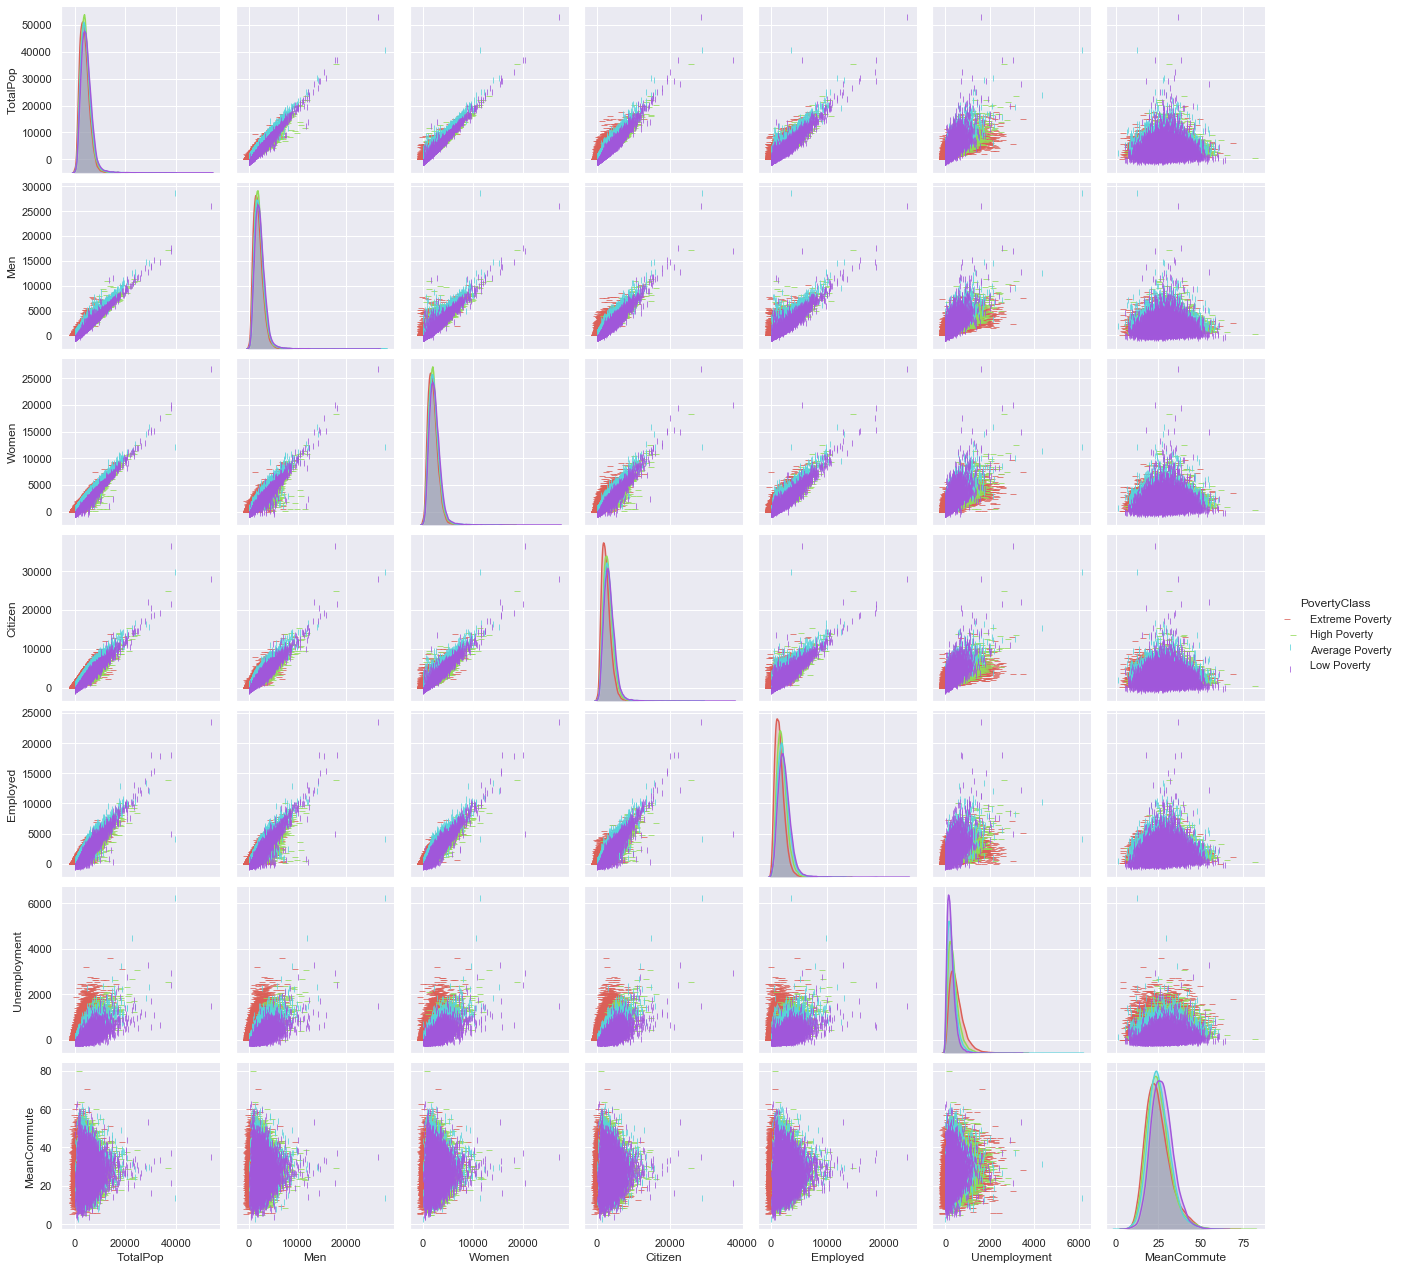

In [81]:
#Additional Cluster scatterplot colored by Poverty Class
addscatterPC = sns.pairplot(addcluster, hue="PovertyClass", hue_order=["Extreme Poverty","High Poverty","Average Poverty", "Low Poverty"], palette = "hls", markers=[0, 1, 2, 3])


## **New Features**

### Poverty Class

Upon initial review of our data set we chose to convert our numeric poverty levels to quartiles that are easily defined in a category. This changed what would have initially been a continuous variable prediction to a categorical variable prediction and therefore framing our lab as a classification problem.

In [82]:
#Create new numerical independent variable: Other to account for reat of percentage of races
PovertyClass = pd.cut(data2015.Poverty,bins=[0,7,12.5,22,100],labels=
['Low Poverty','Average Poverty','High Poverty','Extreme Poverty'])
data2015.insert(37,'PovertyClass',PovertyClass)

PovertyClass = pd.cut(data2017.Poverty,bins=[0,7,12.5,22,100],labels=
['Low Poverty','Average Poverty','High Poverty','Extreme Poverty'])
data2017.insert(37,'PovertyClass',PovertyClass)

data2015.head()

ValueError: cannot insert PovertyClass, already exists

### Aggregate Variables

As we continued to evaluate the dataset we determined that it would work to our advantage if we converted percentage variables back to their whole numbers. We felt both from a visual perspective and the ability to aggregate geographically will be beneficial moving forward.
Below is the code we used in order to do this and create a new data set data2015agg.

In [83]:
#Code to revert percentages back to whole numbers and create aggregated data frames at the county level
data2015agg = data2015.copy()
data2015agg['Hispanic'] = (data2015['Hispanic']/100) * data2015['TotalPop']
data2015agg['White'] = (data2015['White']/100) * data2015['TotalPop']
data2015agg['Black'] = (data2015['Black']/100) * data2015['TotalPop']
data2015agg['Native'] = (data2015['Native']/100) * data2015['TotalPop']
data2015agg['Asian'] = (data2015['Asian']/100) * data2015['TotalPop']
data2015agg['Pacific'] = (data2015['Pacific']/100) * data2015['TotalPop']
data2015agg['Other'] = (data2015['Other']/100) * data2015['TotalPop']
data2015agg['Poverty'] = (data2015['Poverty']/100) * data2015['TotalPop']
data2015agg['ChildPoverty'] = (data2015['ChildPoverty']/100) * data2015['TotalPop']
data2015agg['Professional'] = (data2015['Professional']/100) * data2015['TotalPop']
data2015agg['Service'] = (data2015['Service']/100) * data2015['TotalPop']
data2015agg['Office'] = (data2015['Office']/100) * data2015['TotalPop']
data2015agg['Construction'] = (data2015['Construction']/100) * data2015['TotalPop']
data2015agg['Production'] = (data2015['Production']/100) * data2015['TotalPop']
data2015agg['Drive'] = (data2015['Drive']/100) * data2015['TotalPop']
data2015agg['Carpool'] = (data2015['Carpool']/100) * data2015['TotalPop']
data2015agg['Transit'] = (data2015['Transit']/100) * data2015['TotalPop']
data2015agg['Walk'] = (data2015['Walk']/100) * data2015agg['TotalPop']
data2015agg['OtherTransp'] = (data2015['OtherTransp']/100) * data2015['TotalPop']
data2015agg['WorkAtHome'] = (data2015['WorkAtHome']/100) * data2015['TotalPop']
data2015agg['PrivateWork'] = (data2015['PrivateWork']/100) * data2015['TotalPop']
data2015agg['PublicWork'] = (data2015['PublicWork']/100) * data2015['TotalPop']
data2015agg['SelfEmployed'] = (data2015['SelfEmployed']/100) * data2015['TotalPop']
data2015agg['FamilyWork'] = (data2015['FamilyWork']/100) * data2015['TotalPop']
data2015agg['Unemployment'] = (data2015['Unemployment']/100) * data2015['TotalPop']

df = pd.DataFrame(data2015agg) 
df.to_csv('2015CensusAgg.csv')
data2015agg.head()

#data2015agg.to_csv('2015CensusAgg.csv', index = False, header = True)
#/Users/reagan/Documents/_SMU/Summer_2020/Machine_Learning_I/Projects/Project_1_Viz_Data_Preprocessing/Data/2015CensusAgg.csv

CensusTract    State   County  TotalPop   Men  Women  Hispanic     White  \
0   1001020100  Alabama  Autauga      1948   940   1008    17.532  1702.552   
1   1001020200  Alabama  Autauga      2156  1059   1097    17.248   871.024   
2   1001020300  Alabama  Autauga      2968  1364   1604     0.000  2211.160   
3   1001020400  Alabama  Autauga      4423  2172   2251   464.415  3662.244   
4   1001020500  Alabama  Autauga     10763  4922   5841    75.341  7372.655   

      Black  Native  ...  OtherTransp  WorkAtHome  MeanCommute  Employed  \
0   149.996   5.844  ...       44.804      40.908         25.0       943   
1  1149.148   0.000  ...       15.092       0.000         23.4       753   
2   552.048  14.840  ...        0.000      74.200         19.6      1373   
3   163.651  70.768  ...      114.998      70.768         25.3      1782   
4  2669.224   0.000  ...       64.578      96.867         24.8      5037   

   PrivateWork  PublicWork  SelfEmployed  FamilyWork  Unemployment  \
0     1501.908     356.484        89.608         0.0       105.192   
1     1660.120     364.364       131.516         0.0       286.748   
2     1902.488     700.448       365.064         0.0       184.016   
3     3348.211     937.676       137.113         0.0       477.684   
4     7221.973    2970.588       570.439         0.0       452.046   

      PovertyClass  
0  Average Poverty  
1  Extreme Poverty  
2     High Poverty  
3      Low Poverty  
4  Average Poverty  

[5 rows x 39 columns]

## **Exceptional Work**

### New Features



Our new features listed were both thought of and created in order to have an in depth analysis of our data. We would like to put forth this work to be considered with Exceptional Work.

### Visualizations

We took extra effort to dissect and depict our variables in a fashion that is easily digestible to our reader. We would like to put forth this work to be considered with Exceptional Work.

### Tableau

Python's vizualization capabilties fall short of what we can do in third party tools such as Tableau. Therefore, we have leveraged our data set with Tableau to build unique visualizations.

Since the data set we are working with is census data it is inherently geographic in nature. Therefore, some of the most powerful visualizations we can create will have geopgraphical components. 

To build these visualizations in Tableau we combined our data set with spatial files that map out census tracts provided by census.gov. 

This effort culminated in a Tableau Public Dashboard that can be seen at: https://public.tableau.com/profile/reagan.t.meagher#!/vizhome/PredictingPovertyClass-NewYorkCity/NewYork